# Data Modelling (Variant V)

---

Due to the nature of this dataset, the models utilized for the previous datasets did not provide a good fit for this dataset. This dataset has better seperability in the training data for one of the groups. Due to this difference and time restraints, this dataset was not included in the final analysis. Below is the process of running it through the nine general models used for all other datasets.

In [1]:
%run ../functions.py

In [2]:
X_train_v5_scaled = pd.read_csv('../Data/var5/X_train_v5_scaled.csv')
y_train_v5 = pd.read_csv('../Data/var5/y_train_v5.csv')
X_val_v5_scaled = pd.read_csv('../Data/var5/X_val_v5_scaled.csv')
y_val_v5 = pd.read_csv('../Data/var5/y_val_v5.csv')
X_test_v5_scaled = pd.read_csv('../Data/var5/X_test_v5_scaled.csv')
y_test_v5 = pd.read_csv('../Data/var5/y_test_v5.csv')

---

### Baseline Model

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

v5_baseline_model = DummyClassifier(random_state=21)

v5_baseline_model.fit(X_train_v5_scaled, y_train_v5)

v5_baseline_results = cross_val_score(v5_baseline_model,
                                      X_train_v5_scaled,
                                      y_train_v5,
                                      scoring='recall',
                                      cv=10).mean()

print(f"Train recall: {v5_baseline_results}")

Train recall: 0.010577935527168379


---

### First Model Iteration

In [3]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

n_features = X_train_v5_scaled.shape[1]

In [5]:
def modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v1 = models.Sequential()

    model_v1.add(layers.Input(shape=(n_features, )))
    model_v1.add(layers.Dense(32, activation='relu'))
    model_v1.add(layers.Dense(16, activation='relu'))
    model_v1.add(layers.Dense(1, activation='sigmoid'))

    model_v1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v1_history = model_v1.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v1,
             name,
             model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00007: early stopping
Results for Variant V Model V1 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


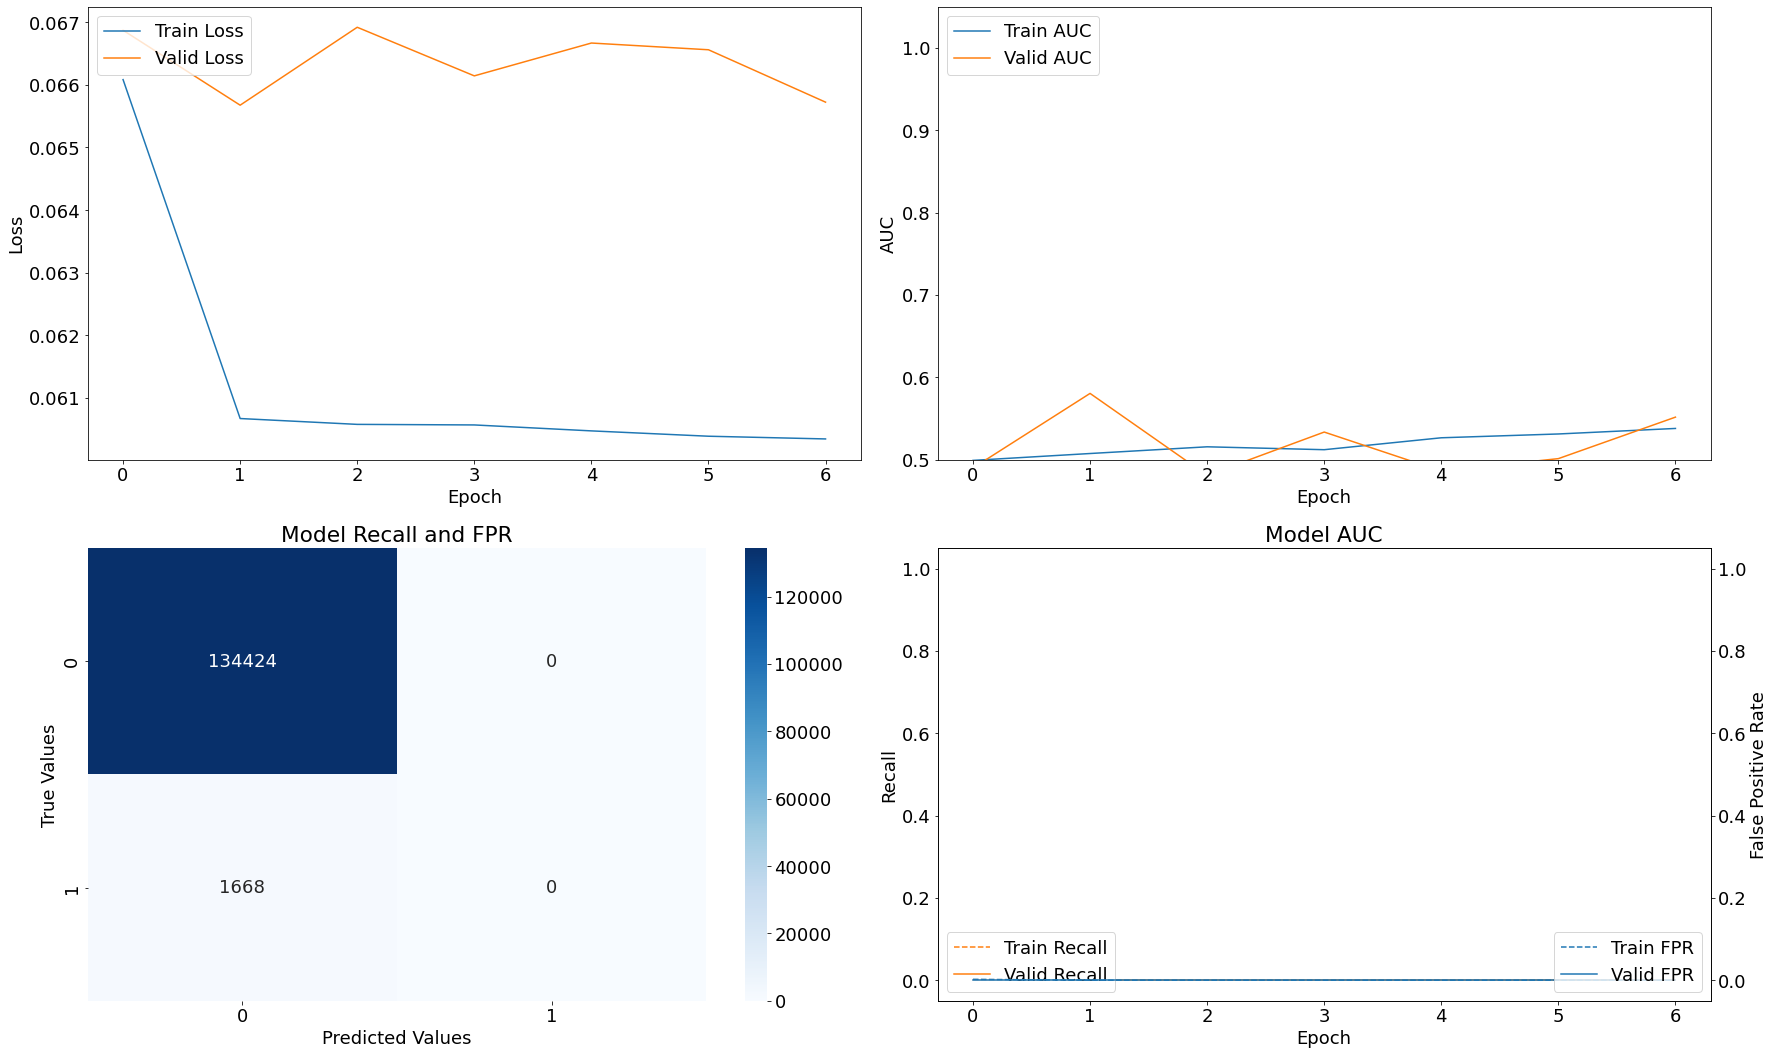

In [6]:
modelling_v1(X_train_v5_scaled,
             y_train_v5,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V1')

---

### Second Model Iteration

In [7]:
def modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v2 = models.Sequential()

    model_v2.add(layers.Input(shape=(n_features, )))
    model_v2.add(layers.Dense(32, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(16, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['AUC',
                                   tf.keras.metrics.Precision(thresholds=threshold),
                                   tf.keras.metrics.Recall(thresholds=threshold),
                                   FalsePositiveRate(threshold=threshold)])

    model_v2_history = model_v2.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v2,
             name,
             model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00008: early stopping
Results for Variant V Model V2 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


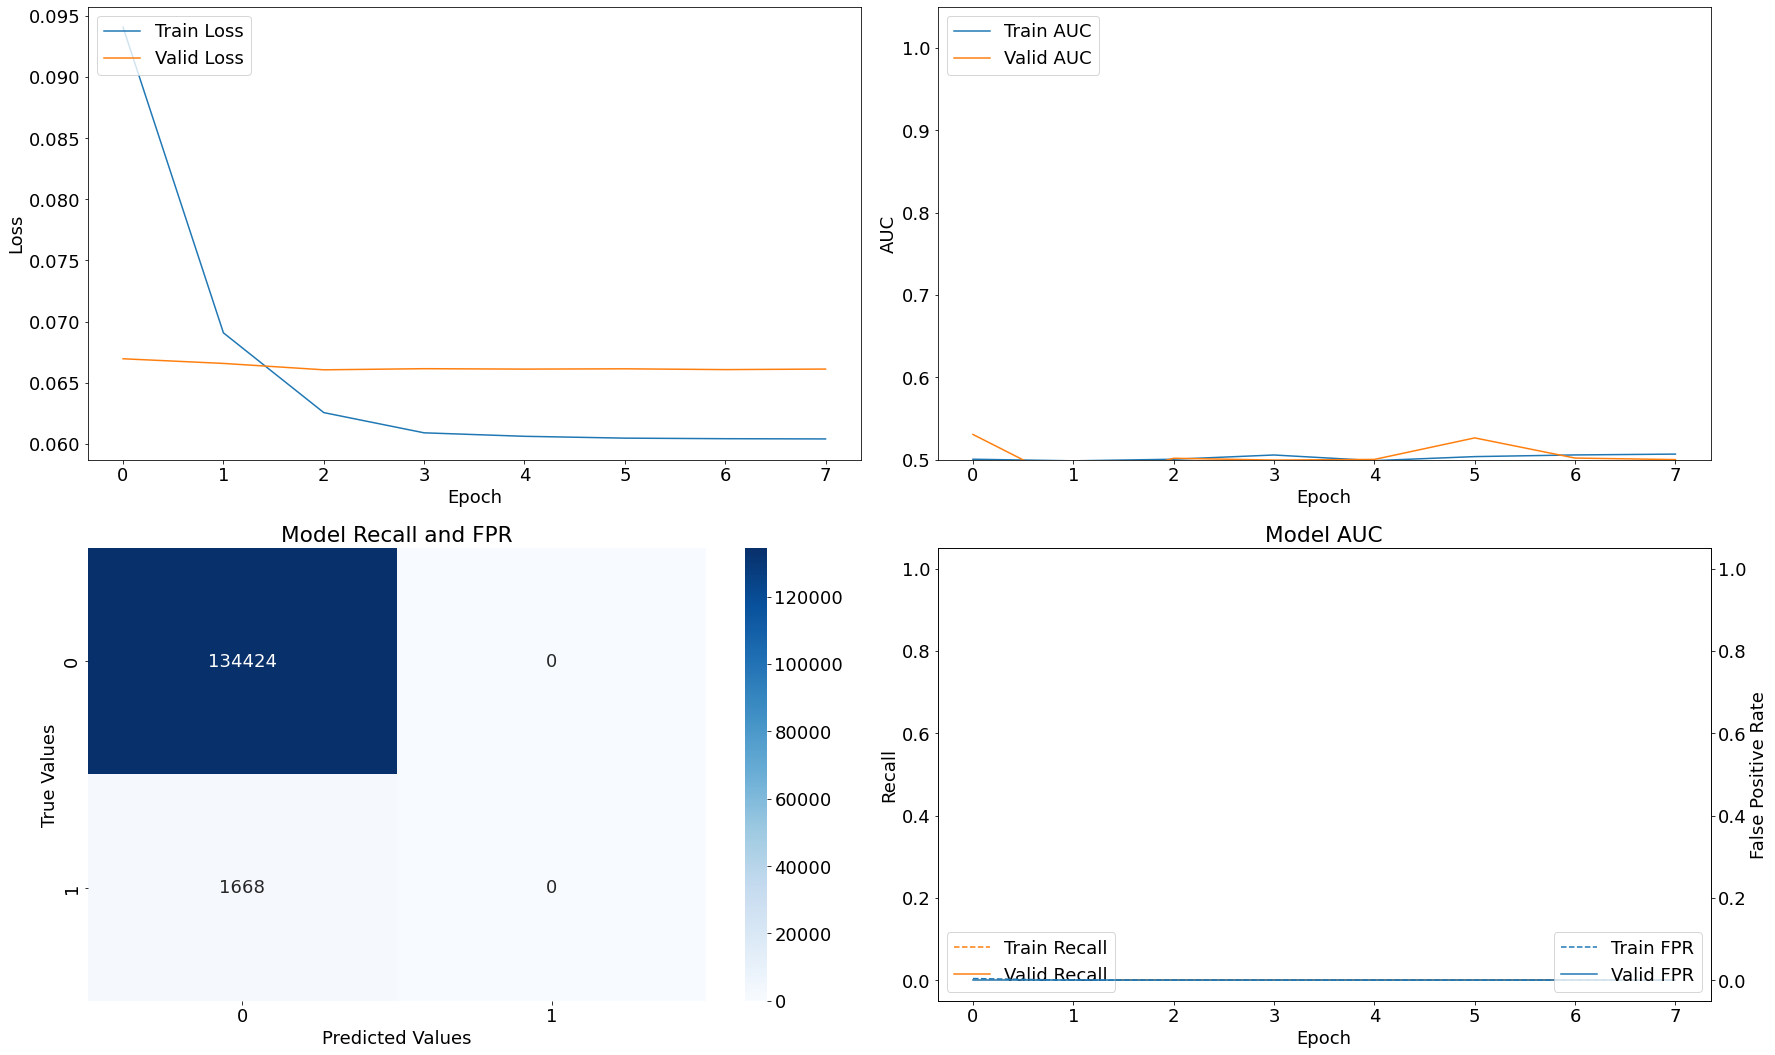

In [8]:
modelling_v2(X_train_v5_scaled,
             y_train_v5,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model V2')

---

### Third Model Iteration

In [4]:
class_weight = create_class_weight({0: len(y_train_v5 == 0), 1: len(y_train_v5 == 1)})

In [10]:
def modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v3 = models.Sequential()

    model_v3.add(layers.Input(shape=(n_features, )))
    model_v3.add(layers.Dense(32, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(16, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(1, activation='sigmoid'))

    model_v3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v3_history = model_v3.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v3,
             name,
             model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00007: early stopping
Results for Variant V Model v5 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


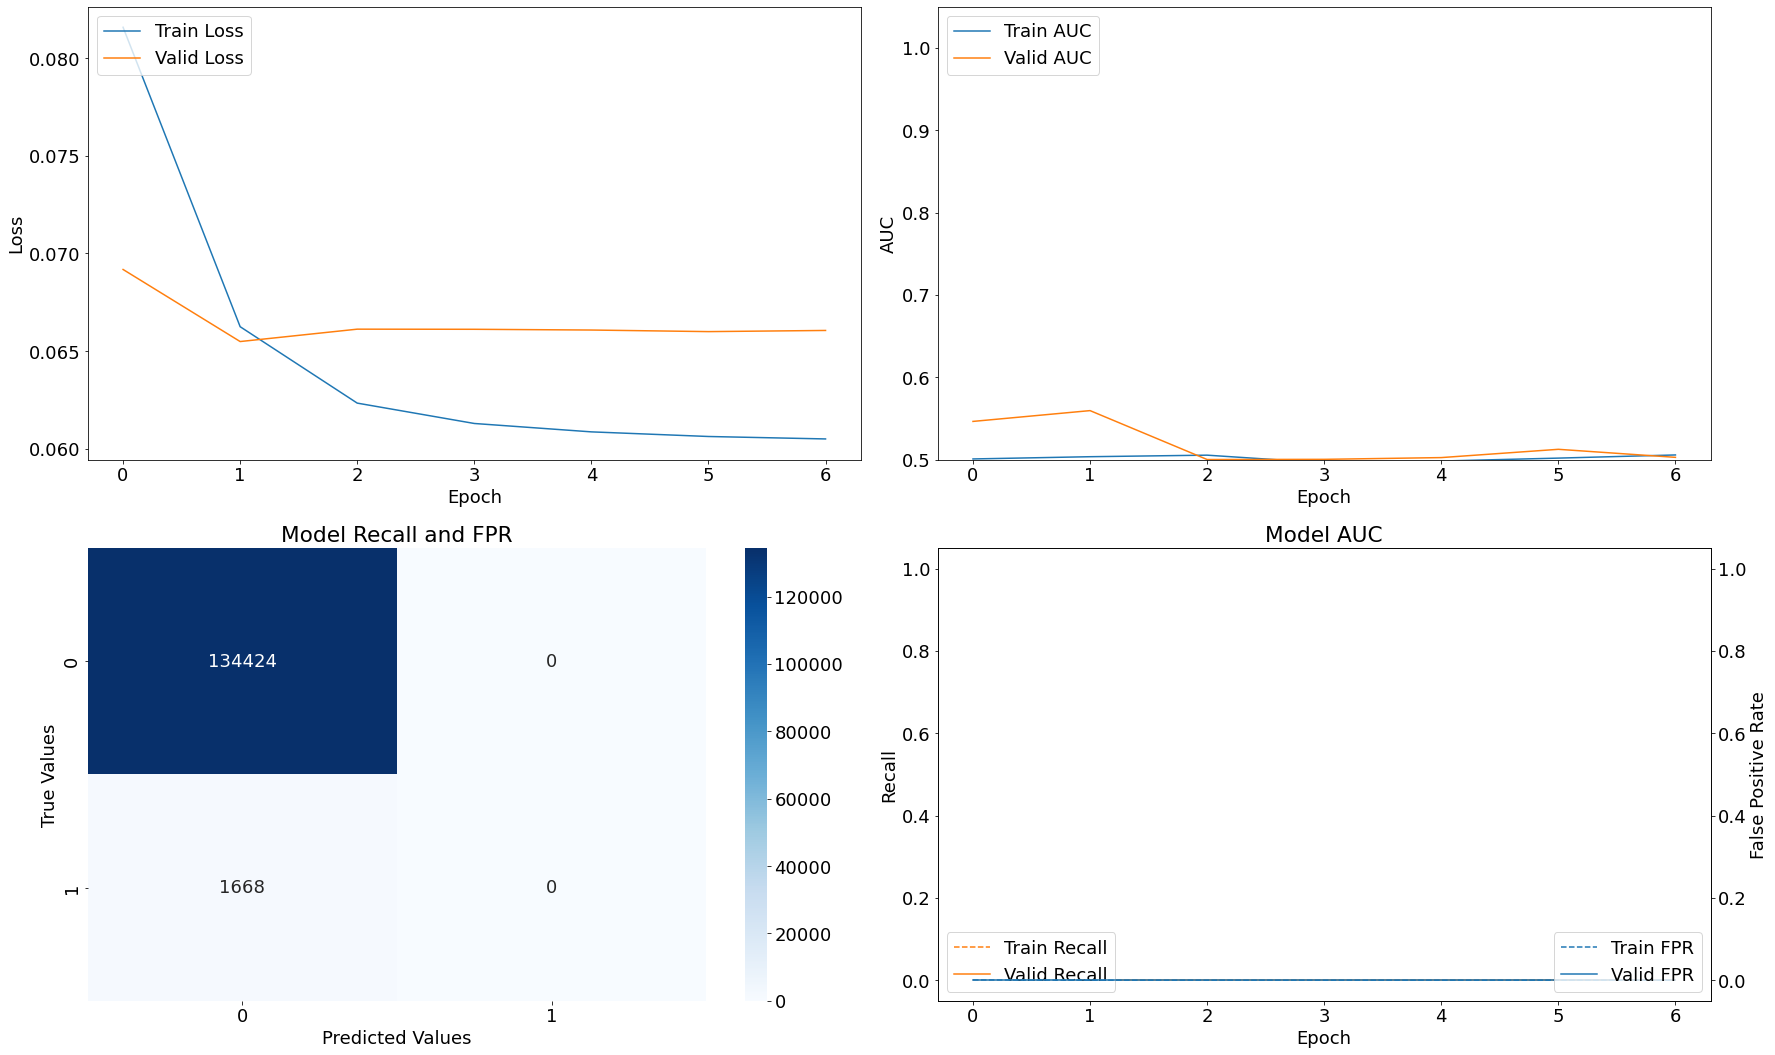

In [11]:
modelling_v3(X_train_v5_scaled,
             y_train_v5,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model v5')

---

### Fourth Model Iteration

The fourth model is where it became evident that this data behaved differently than the other five datasets utilized. Different SMOTE sampling strategies were tested and the best performing, a sampling strategy of 0.9, was used for all the models below. That being said, the models did a very poor job of minimizing the false positive rate while maximizing recall. Generally, it performed very well in regard to one of these two metrics, but not both.

In [106]:
X_train_v5_scaled_resampled = pd.read_csv('../Data/var5/X_train_v5_scaled_resampled.csv')
y_train_v5_resampled = pd.read_csv('../Data/var5/y_train_v5_resampled.csv')

In [5]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

In [108]:
def modelling_v4(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):    
    
    model_v4 = models.Sequential()

    model_v4.add(layers.Input(shape=(n_features, )))
    model_v4.add(layers.Dense(32, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(16, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(1, activation='sigmoid'))

    model_v4.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v4_history = model_v4.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history

    evaluate(model_v4,
             name,
             model_v4_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00014: early stopping
Results for Variant V Model v5 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.3818519413471222 
 Val Recall: 0.0 

 Train FPR: 0.04003551974892616 
 Val FPR: 2.9756591175100766e-05


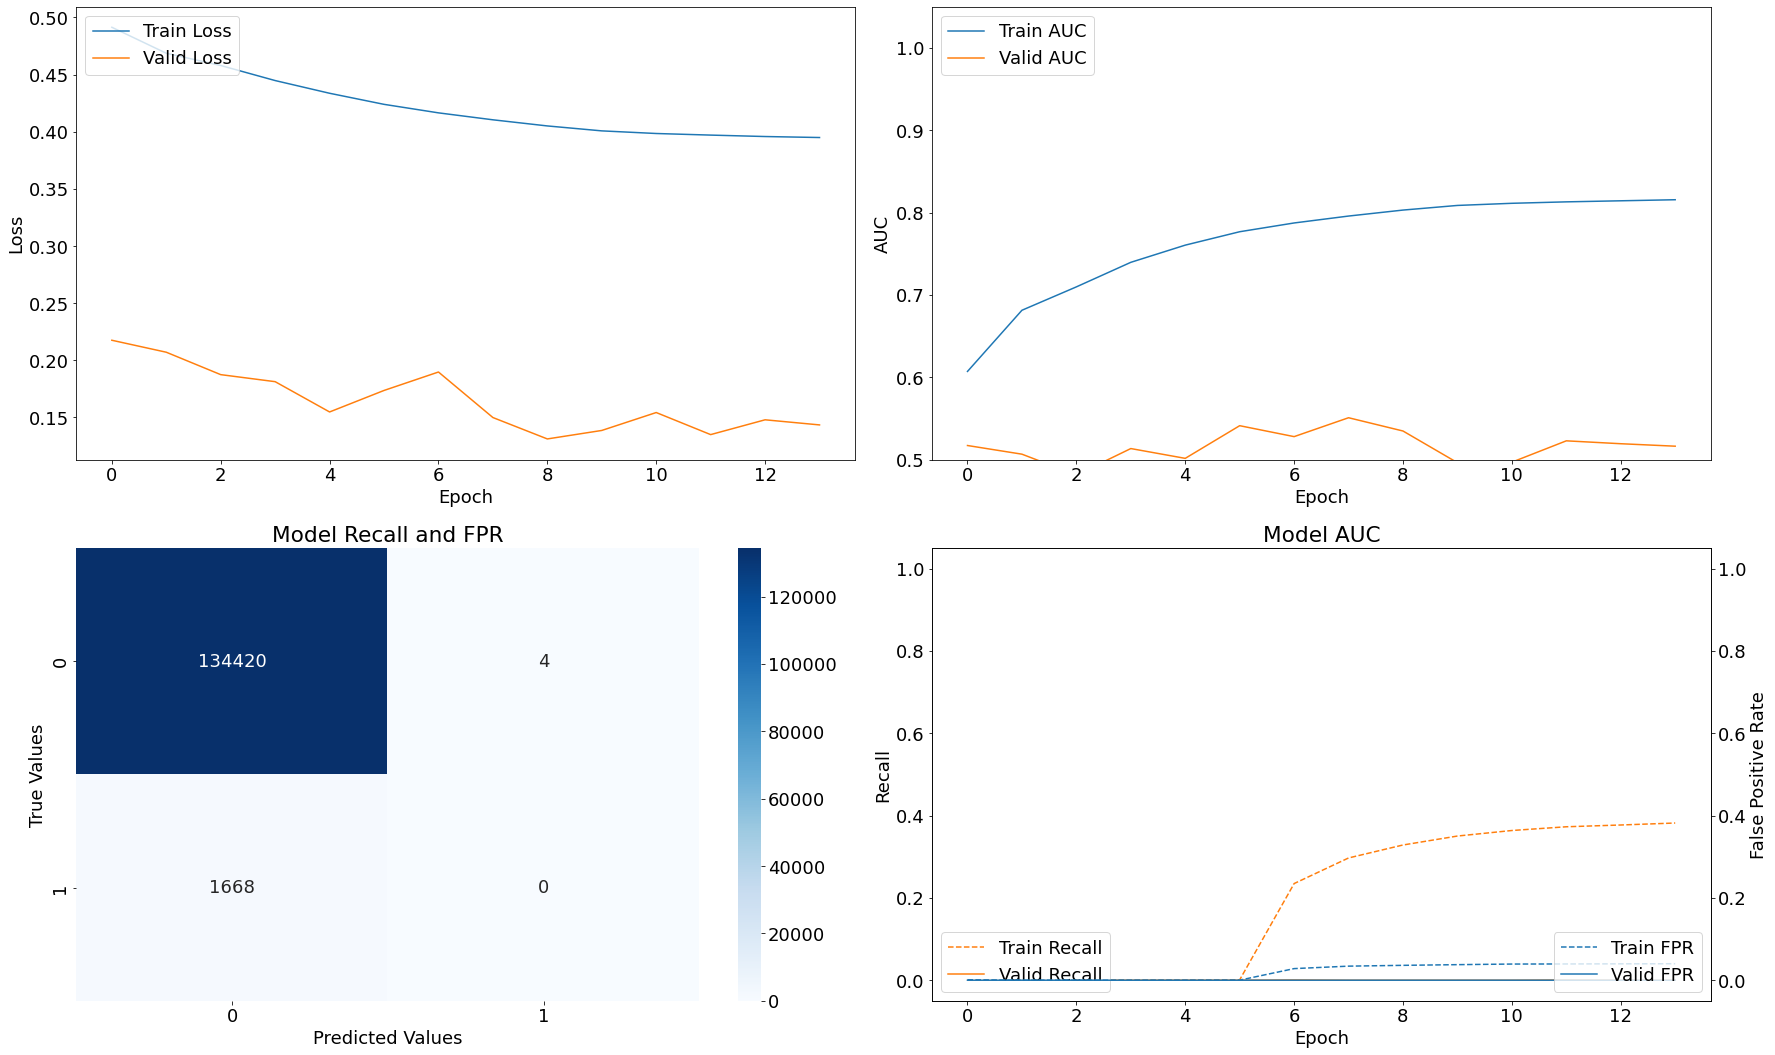

In [109]:
modelling_v4(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model v5')

In [6]:
X_train_v5_scaled_resampled, y_train_v5_resampled = \
SMOTE(random_state=21, sampling_strategy=0.9) \
.fit_resample(X_train_v5_scaled,y_train_v5)

pd.DataFrame(X_train_v5_scaled_resampled) \
.to_csv('../Data/var5/X_train_v5_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_v5_resampled) \
.to_csv('../Data/var5/y_train_v5_resampled.csv', index=False)

In [139]:
model_v4 = models.Sequential()

model_v4.add(layers.Input(shape=(n_features, )))
model_v4.add(layers.Dense(32, activation='relu'))
model_v4.add(layers.Dropout(0.5))
model_v4.add(layers.Dense(16, activation='relu'))
model_v4.add(layers.Dropout(0.5))
model_v4.add(layers.Dense(1, activation='sigmoid'))

model_v4.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['AUC',
                          tf.keras.metrics.Precision(),
                          tf.keras.metrics.Recall(),
                          FalsePositiveRate()])

model_v4_history = model_v4.fit(X_train_v5_scaled_resampled,
                                y_train_v5_resampled,
                                batch_size=256,
                                validation_data=(X_val_v5_scaled, y_val_v5),
                                class_weight=class_weight,
                                epochs=50,
                                callbacks=[early_stop],
                                verbose=0).history

preds = model_v4.predict(X_val_v5_scaled)

Epoch 00011: early stopping


In [140]:
np.average(preds)

0.2846849

In [141]:
preds.max()

0.78170073

In [142]:
y_pred_adjusted = np.zeros([len(y_val_v5), ])
j=0
for p in preds:
    if p > 0.5:
        y_pred_adjusted[j] = 1
        j+=1
    else:
        y_pred_adjusted[j] = 0
        j+=1

In [143]:
y_pred_adjusted.sum()

8849.0

Epoch 00015: early stopping
Results for Variant V Model v5 with threshold = 0.5.

 Train f1: 0.7458313216719322 
 Val f1: 0.036106751530191515 

 Train Recall: 0.7652768492698669 
 Val Recall: 0.1516786515712738 

 Train FPR: 0.2581809163093567 
 Val FPR: 0.08996161073446274


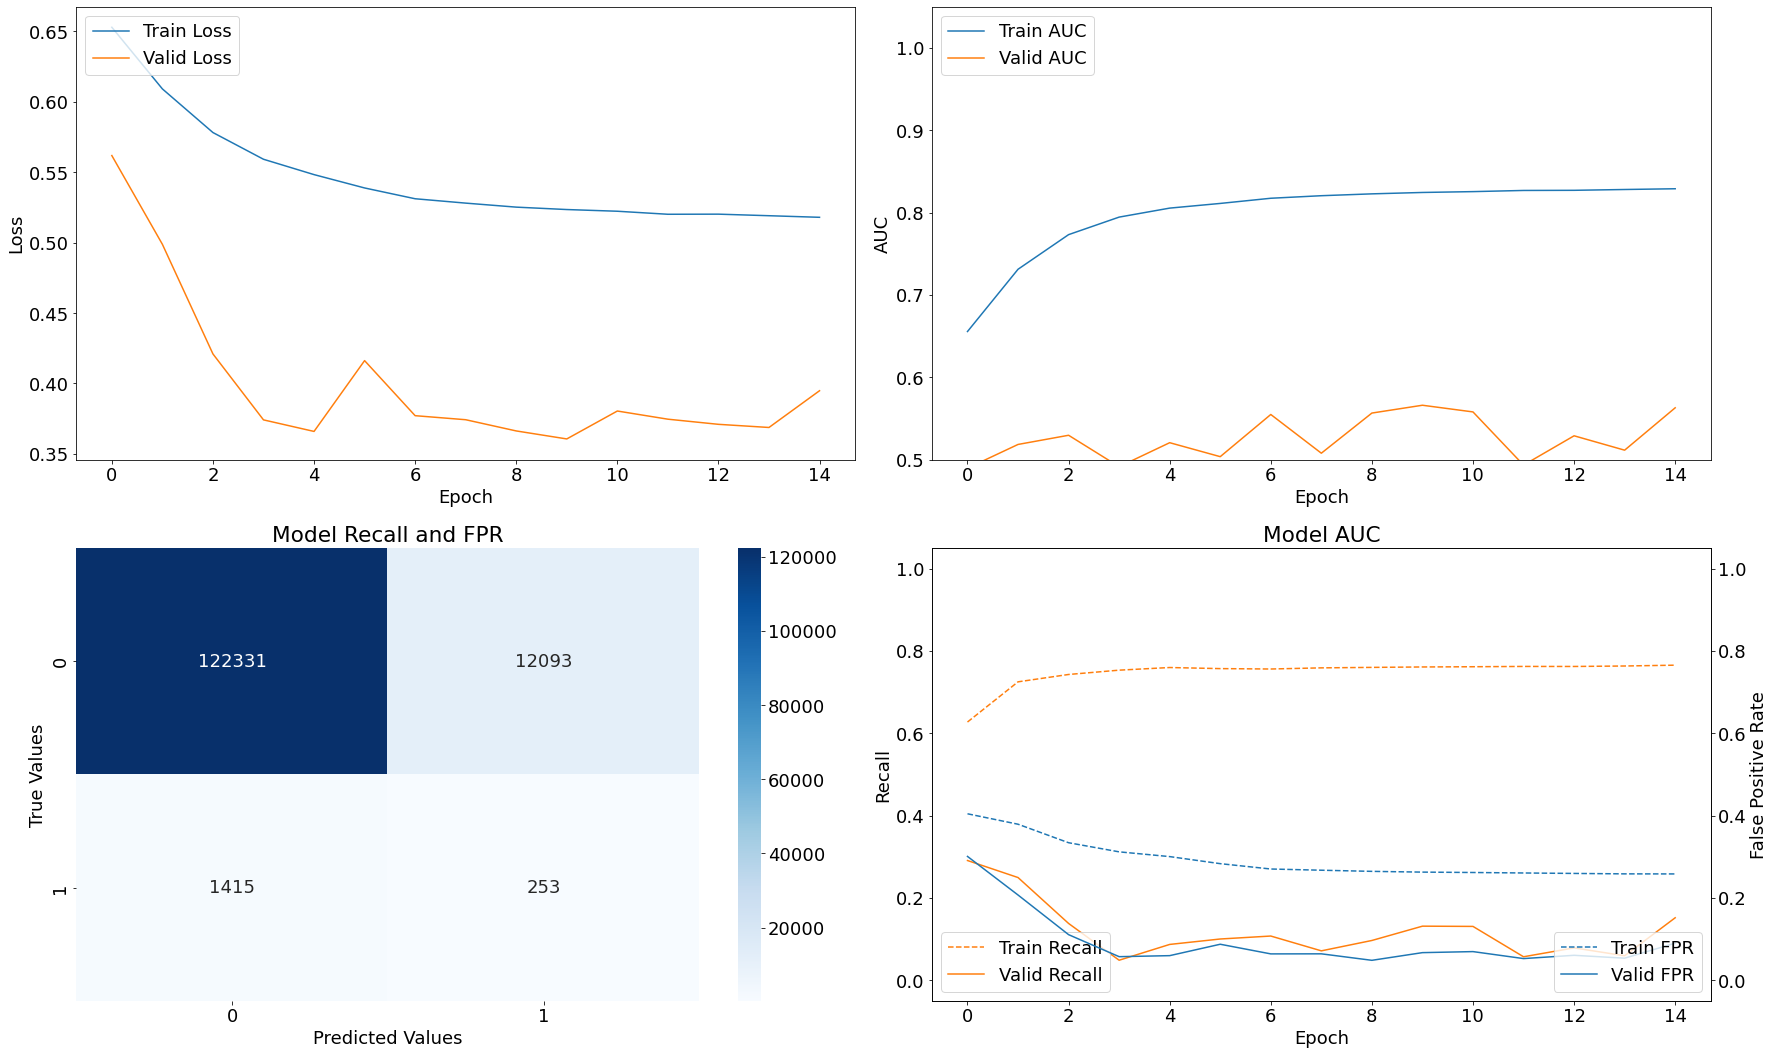

In [144]:
modelling_v4(X_train_v5_scaled_resampled,
             y_train_v5_resampled,
             X_val_v5_scaled,
             y_val_v5,
             'Variant V Model v5')

Epoch 00019: early stopping
Results for Variant V Model v5 with threshold = 0.5.

 Train f1: 0.7470553480140024 
 Val f1: 0.013693419685742699 

 Train Recall: 0.7136878371238708 
 Val Recall: 0.010791366919875145 

 Train FPR: 0.17728321254253387 
 Val FPR: 0.007015116512775421


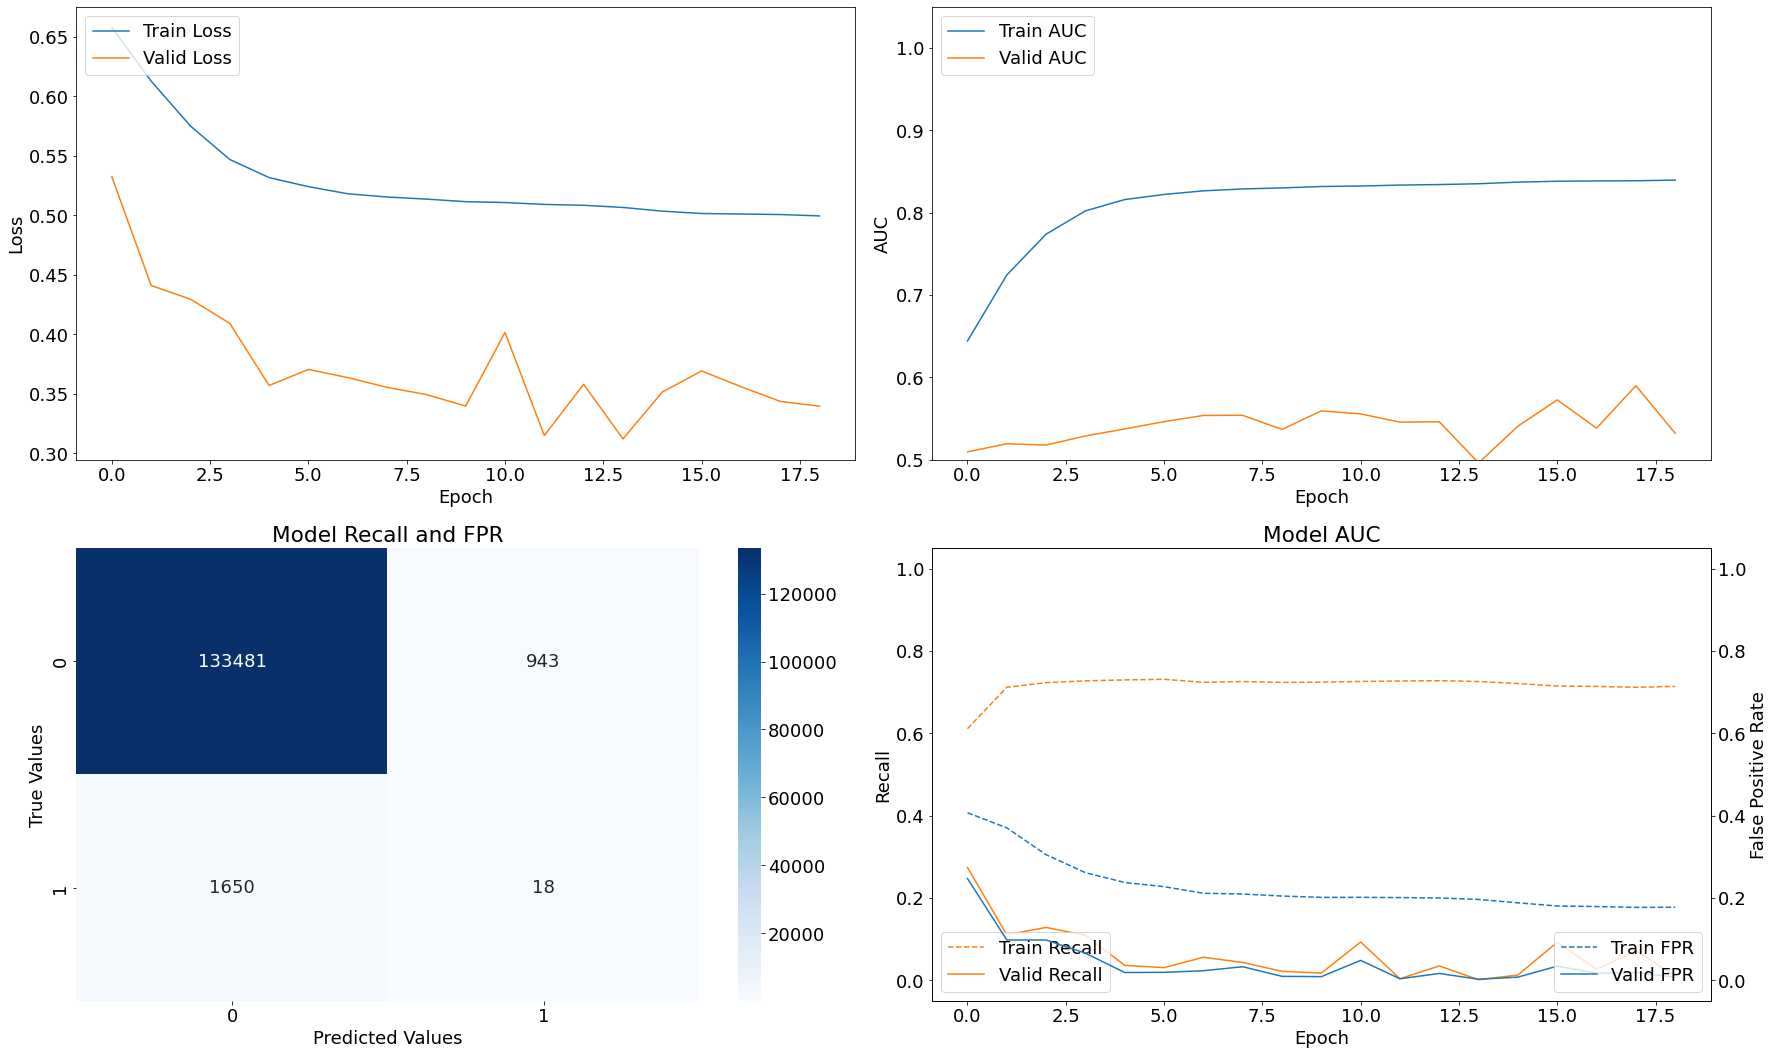

Epoch 00014: early stopping
Results for Variant V Model v5 with threshold = 0.4.

 Train f1: 0.748296464990317 
 Val f1: 0.03248825505349596 

 Train Recall: 0.8279175758361816 
 Val Recall: 0.2715827226638794 

 Train FPR: 0.34639984369277954 
 Val FPR: 0.19167707860469818


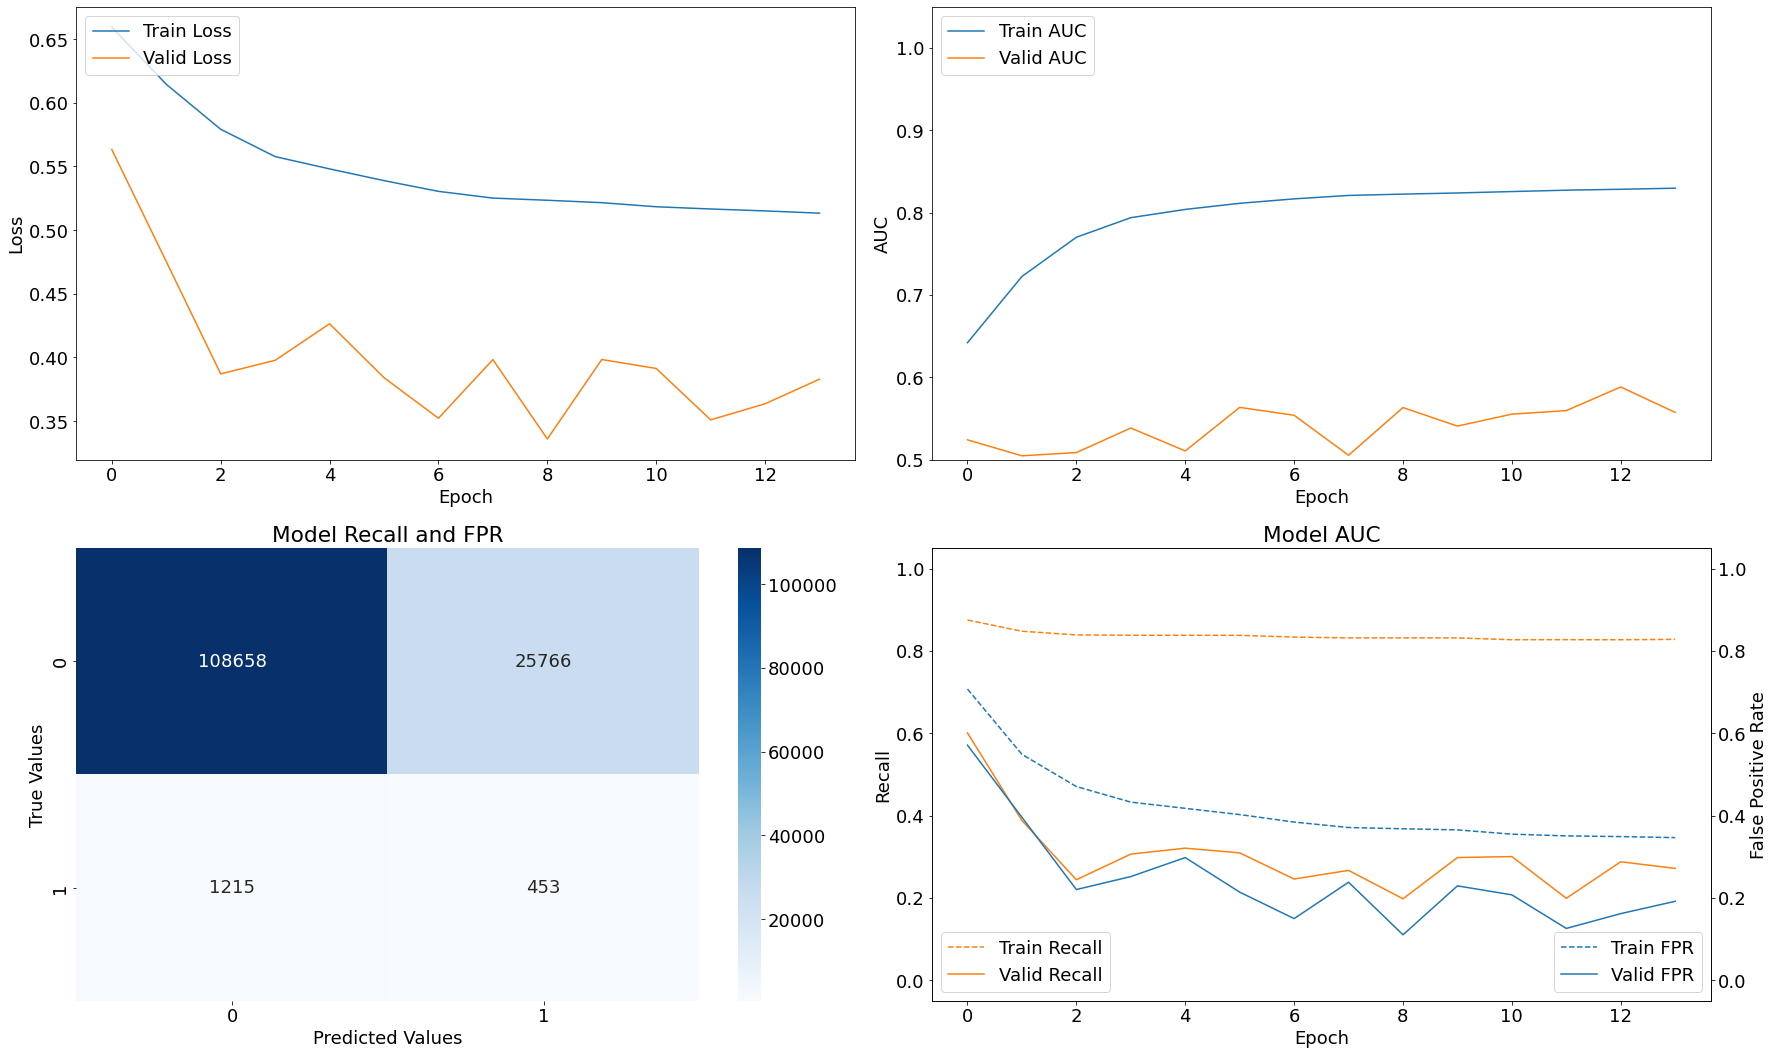

Epoch 00015: early stopping
Results for Variant V Model v5 with threshold = 0.3.

 Train f1: 0.7320641791369755 
 Val f1: 0.028282696802757454 

 Train Recall: 0.8997048735618591 
 Val Recall: 0.5209832191467285 

 Train FPR: 0.5024606585502625 
 Val FPR: 0.4382699429988861


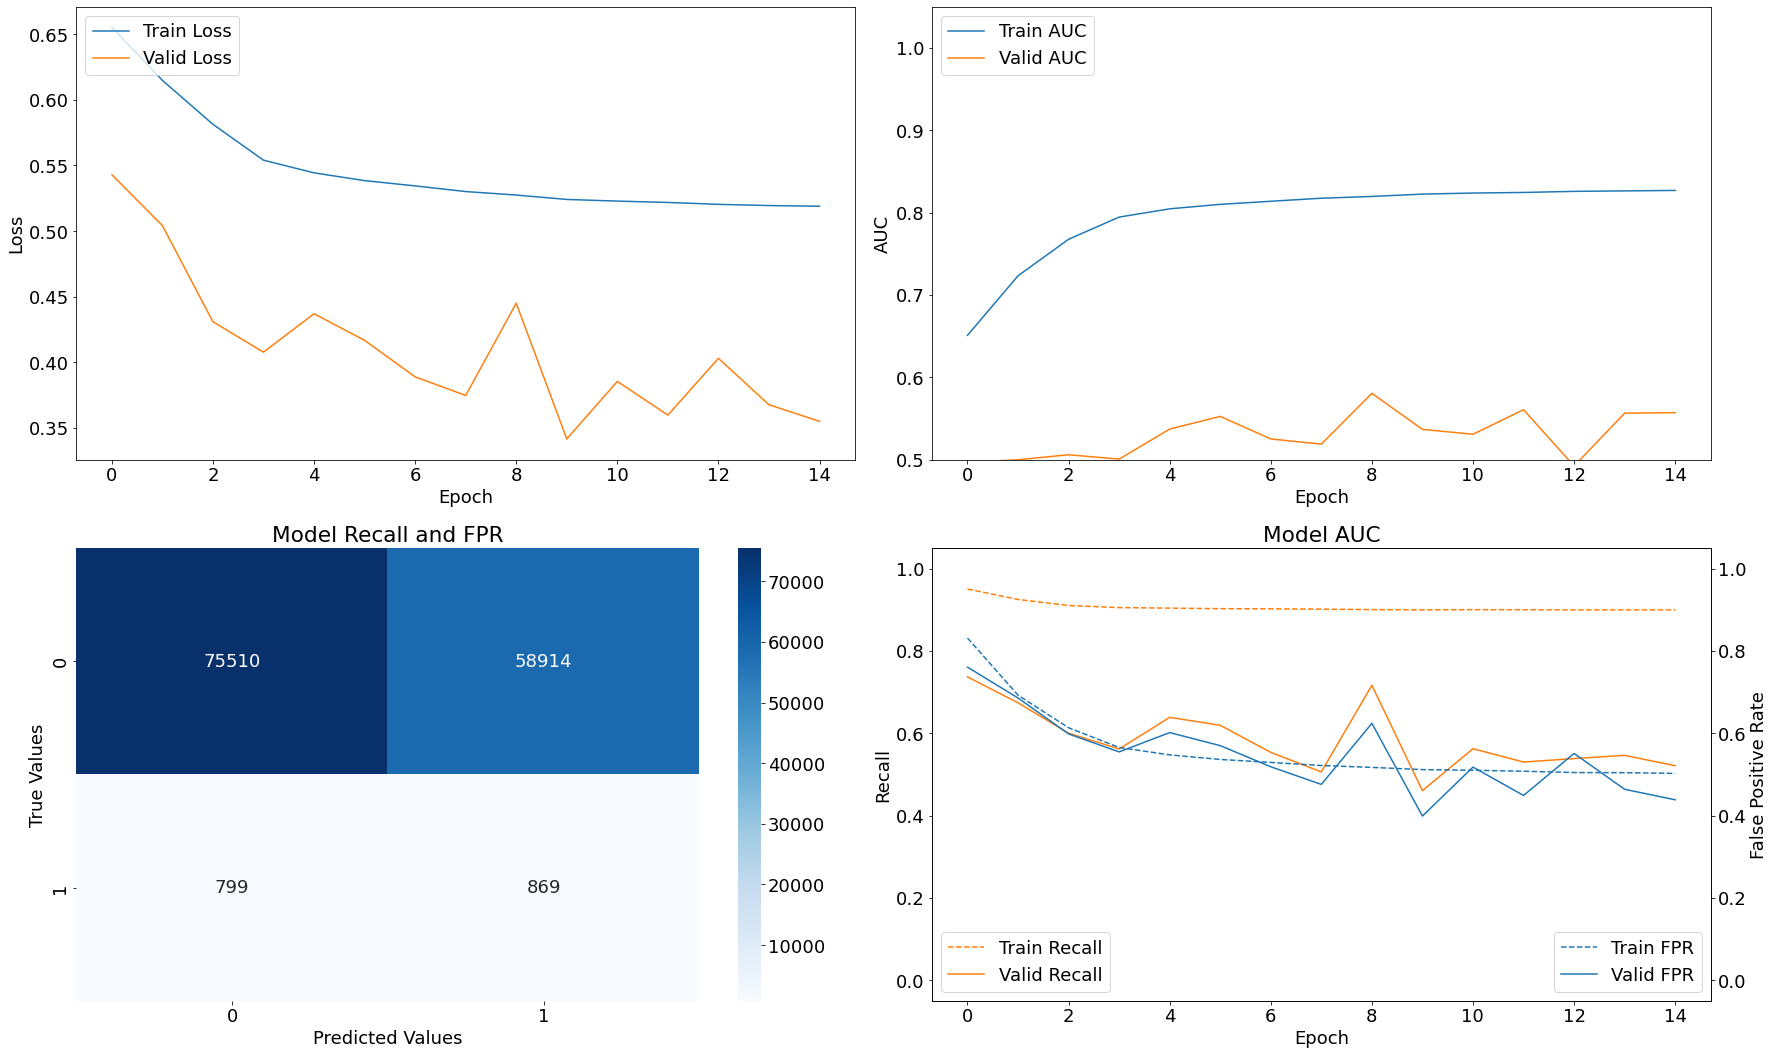

Epoch 00015: early stopping
Results for Variant V Model v5 with threshold = 0.2.

 Train f1: 0.704627672216294 
 Val f1: 0.02395501101938799 

 Train Recall: 0.9525665044784546 
 Val Recall: 0.8261390924453735 

 Train FPR: 0.676059901714325 
 Val FPR: 0.8332068920135498


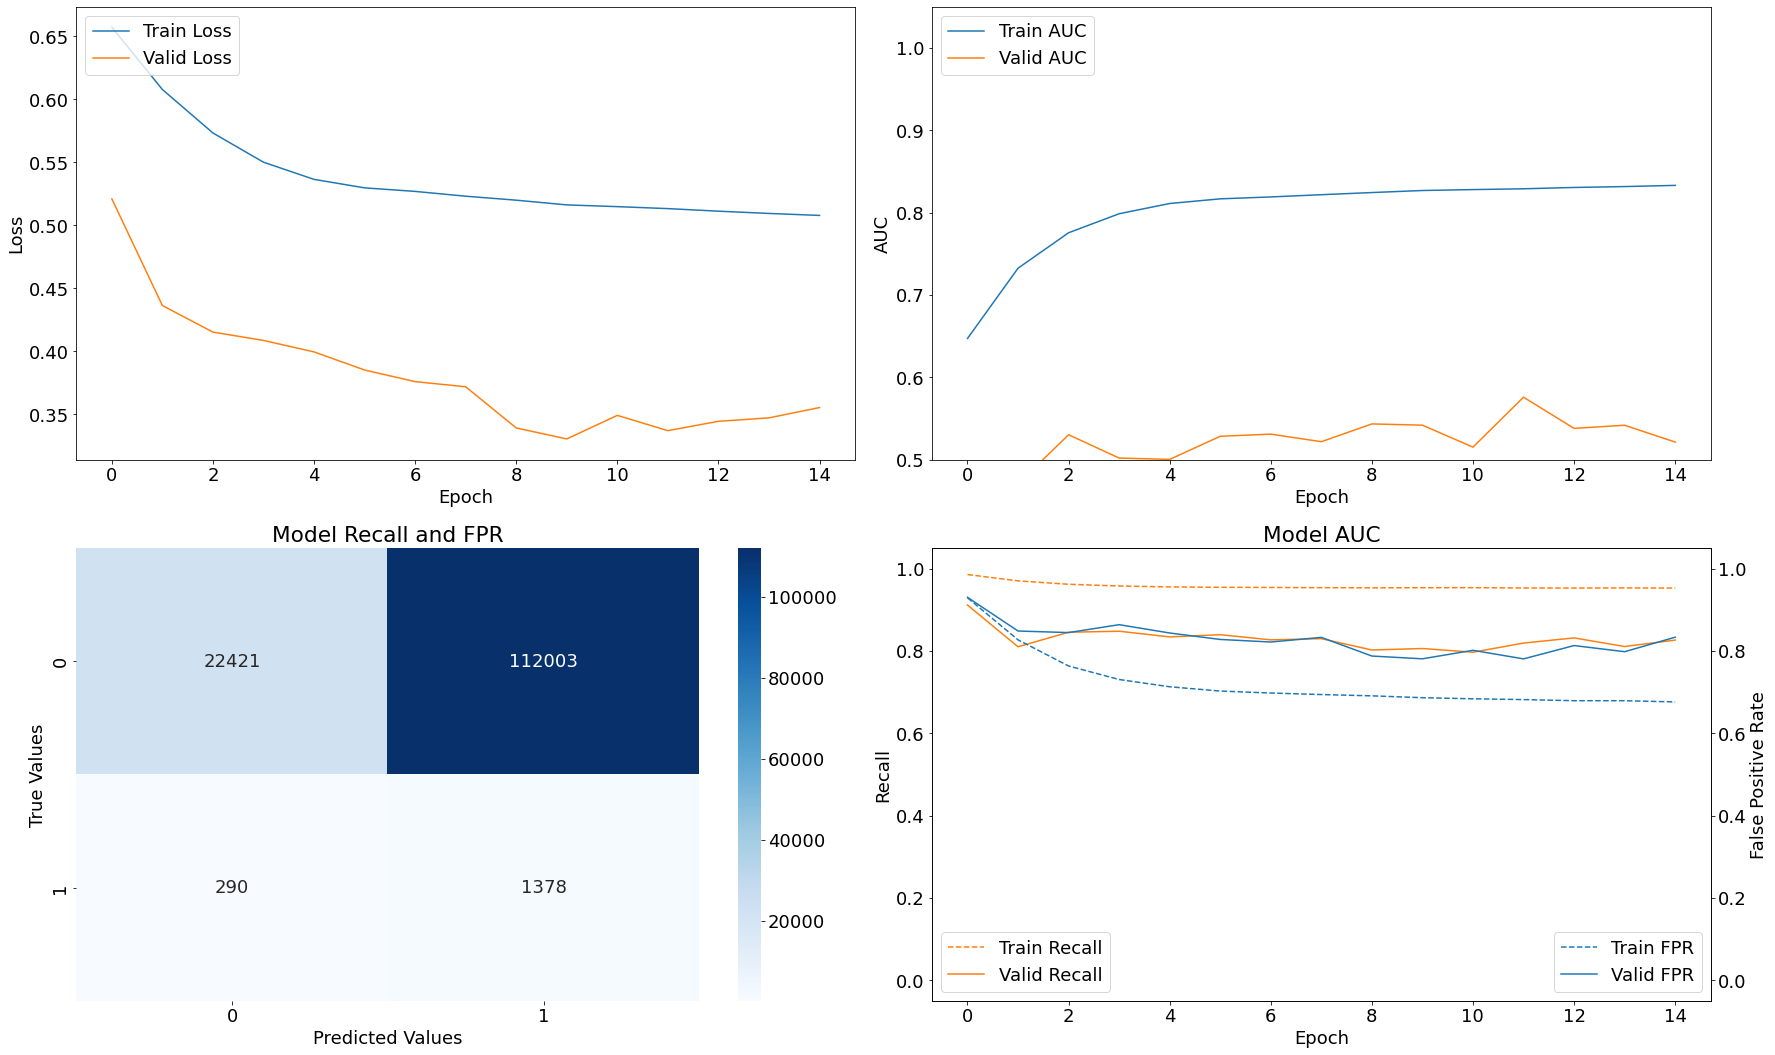

Epoch 00012: early stopping
Results for Variant V Model v5 with threshold = 0.1.

 Train f1: 0.6719929866064978 
 Val f1: 0.02415869439042481 

 Train Recall: 0.9841957688331604 
 Val Recall: 0.980215847492218 

 Train FPR: 0.8504897952079773 
 Val FPR: 0.9823543429374695


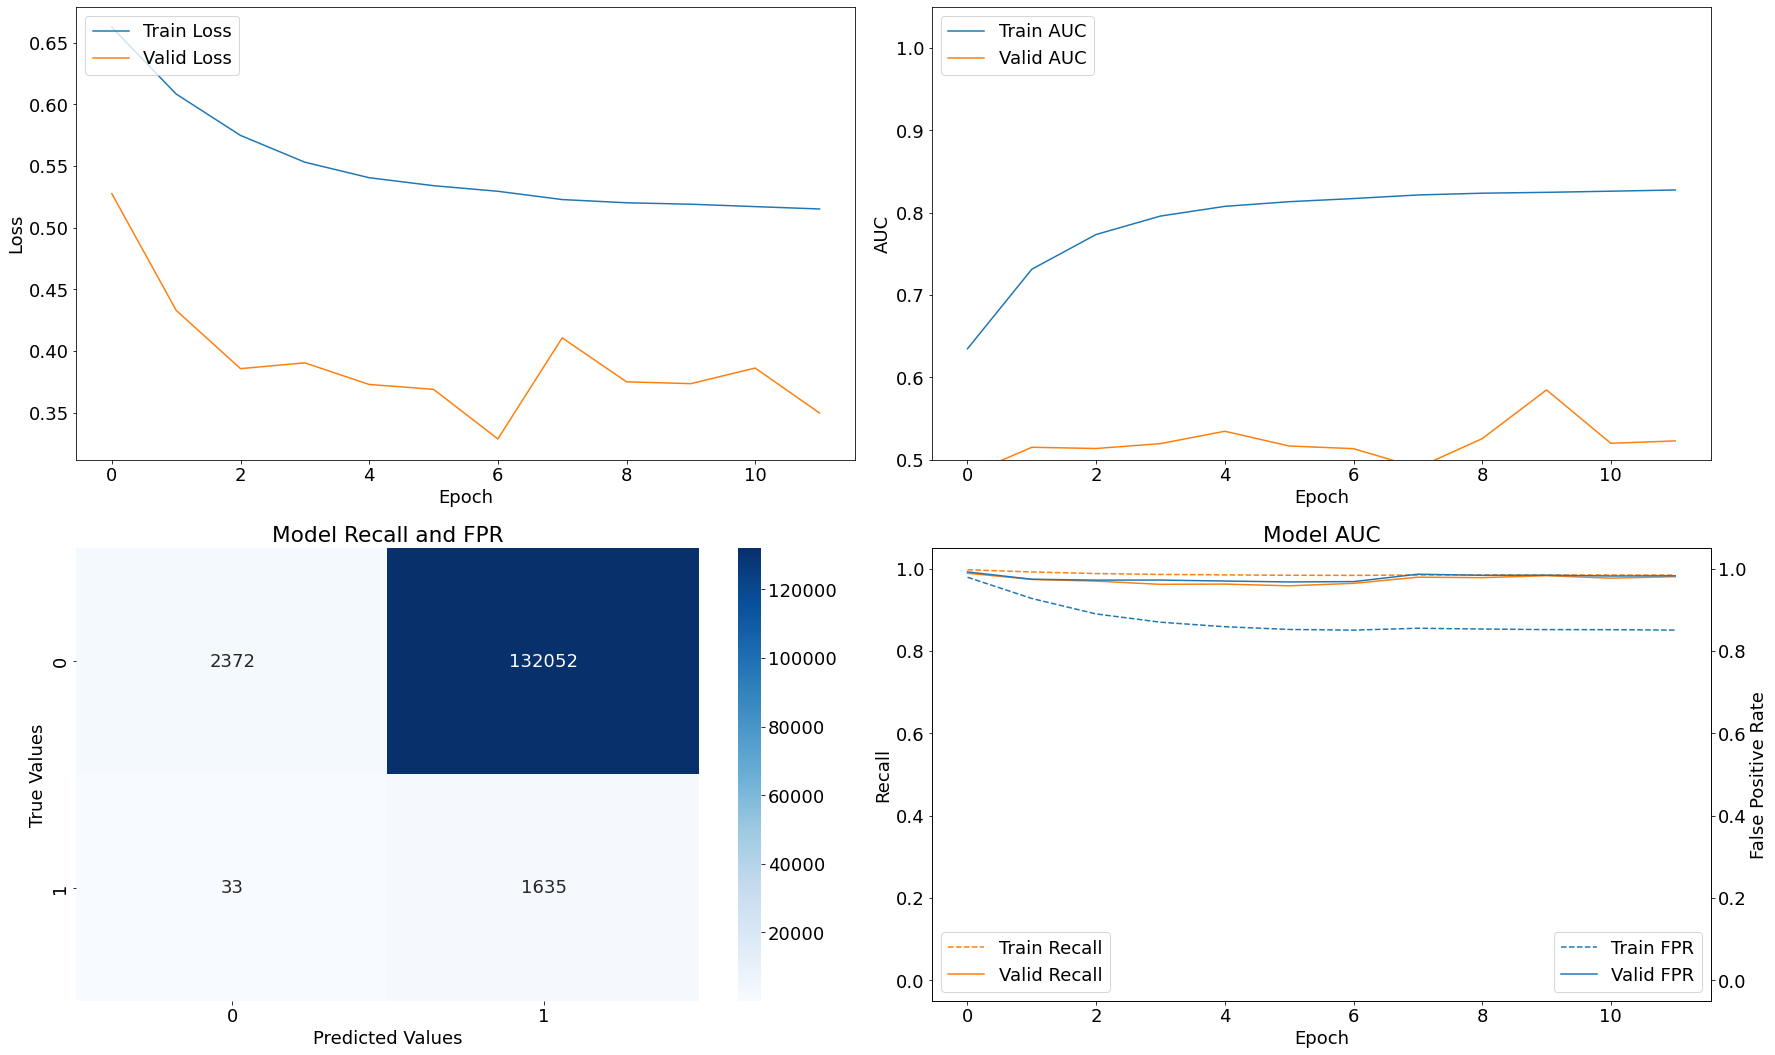

In [145]:
for t in thresholds:
    
    modelling_v4(X_train_v5_scaled_resampled,
                 y_train_v5_resampled,
                 X_val_v5_scaled,
                 y_val_v5,
                 'Variant V Model v5',
                 threshold=t)

---

### Fifth Model Iteration

In [146]:
def modelling_v5(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v5 = models.Sequential()

    model_v5.add(layers.Input(shape=(n_features, )))
    model_v5.add(layers.Dense(32, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(16, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(8, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(4, activation='relu'))
    model_v5.add(layers.Dense(2, activation='relu'))
    model_v5.add(layers.Dense(1, activation='sigmoid'))

    model_v5.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v5_history = model_v5.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v5,
             name,
             model_v5_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00009: early stopping
Results for Variant V Model V5 with threshold = 0.5.

 Train f1: 0.7021108825658563 
 Val f1: 0.018518518415616518 

 Train Recall: 0.6387391090393066 
 Val Recall: 0.015587530098855495 

 Train FPR: 0.1626700460910797 
 Val FPR: 0.008287210948765278


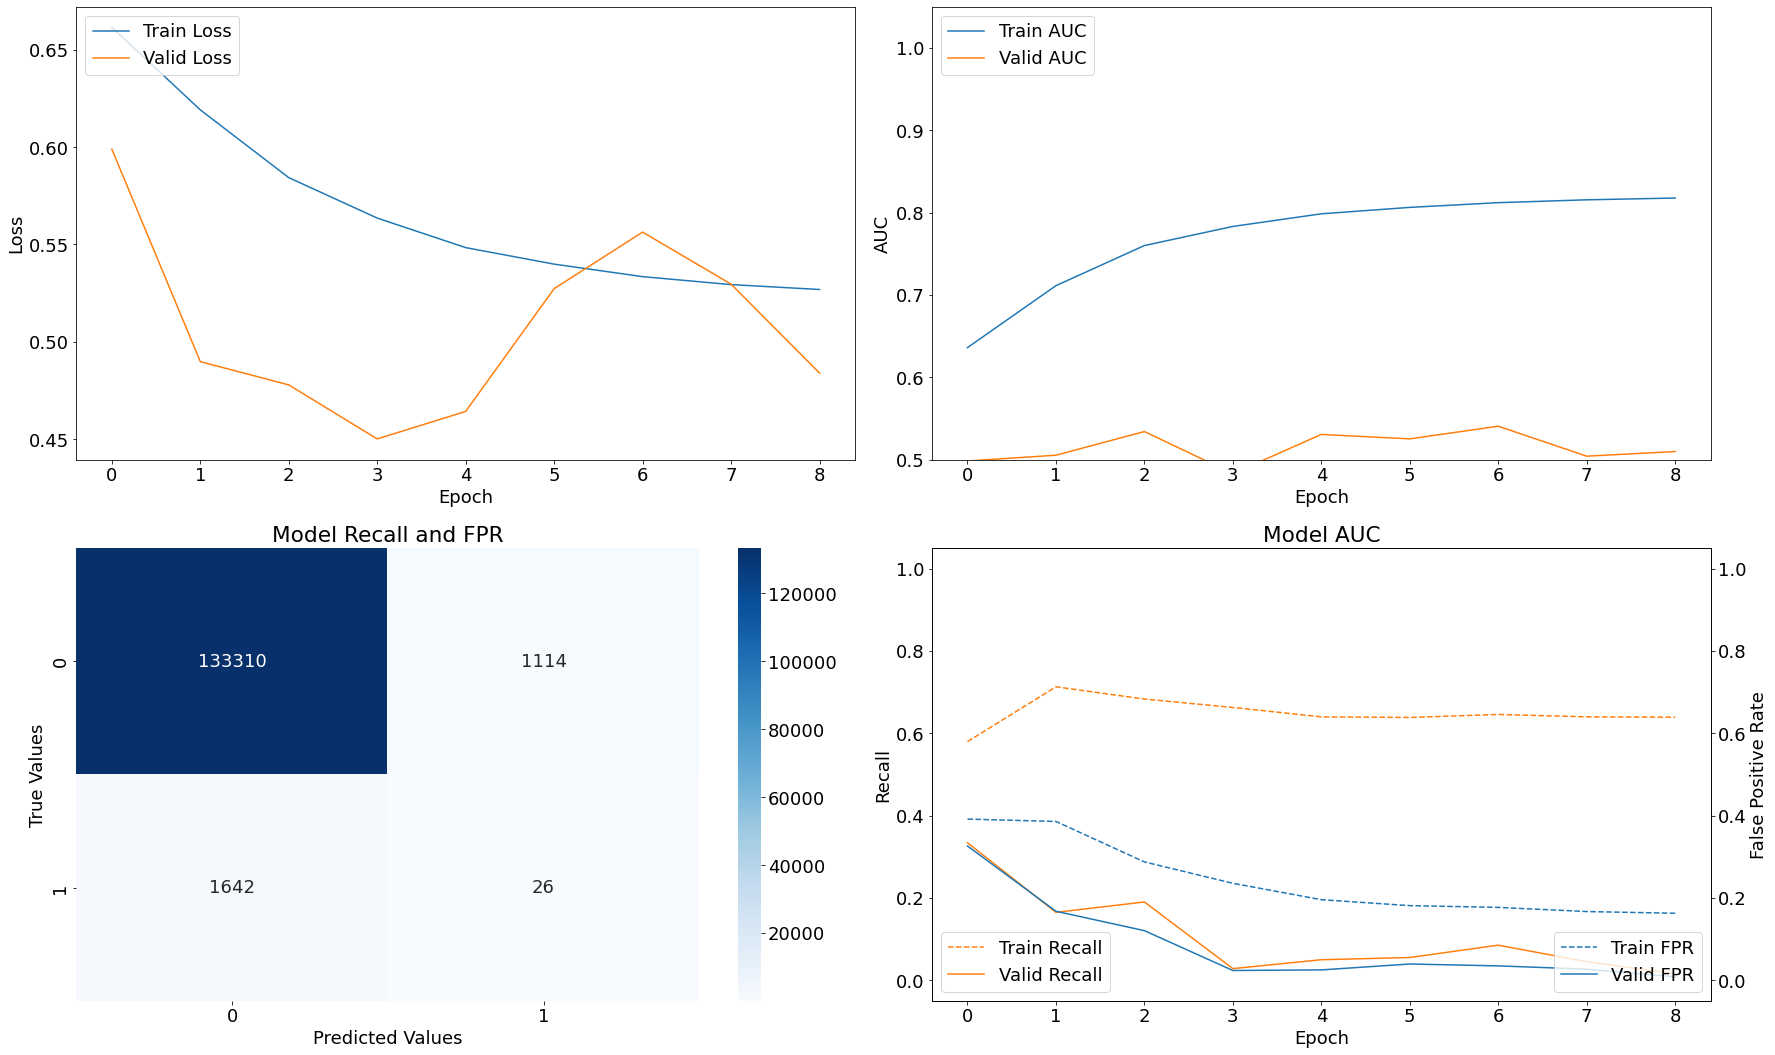

Epoch 00014: early stopping
Results for Variant V Model V5 with threshold = 0.4.

 Train f1: 0.748742410956427 
 Val f1: 0.02931437011021673 

 Train Recall: 0.771900475025177 
 Val Recall: 0.32374101877212524 

 Train FPR: 0.26096218824386597 
 Val FPR: 0.25764745473861694


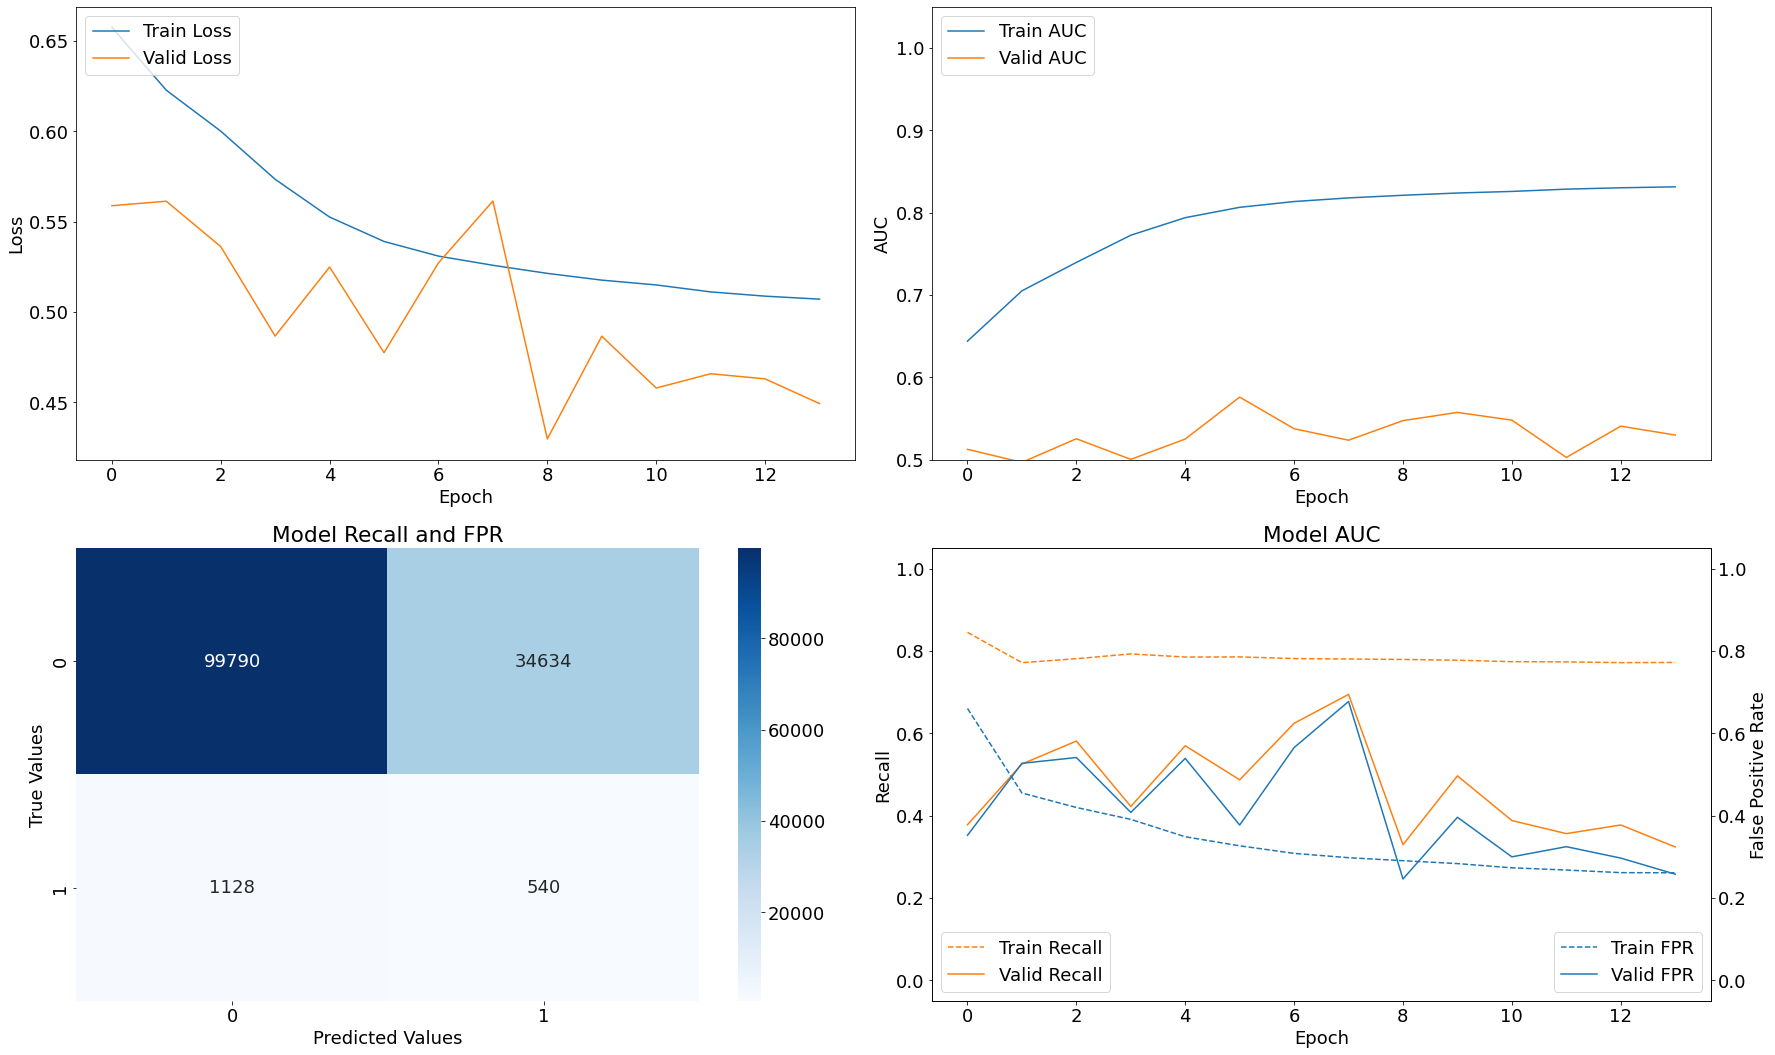

Epoch 00037: early stopping
Results for Variant V Model V5 with threshold = 0.3.

 Train f1: 0.7460655029218339 
 Val f1: 0.02492131648563294 

 Train Recall: 0.8782192468643188 
 Val Recall: 0.4058752954006195 

 Train FPR: 0.4284442067146301 
 Val FPR: 0.3867315351963043


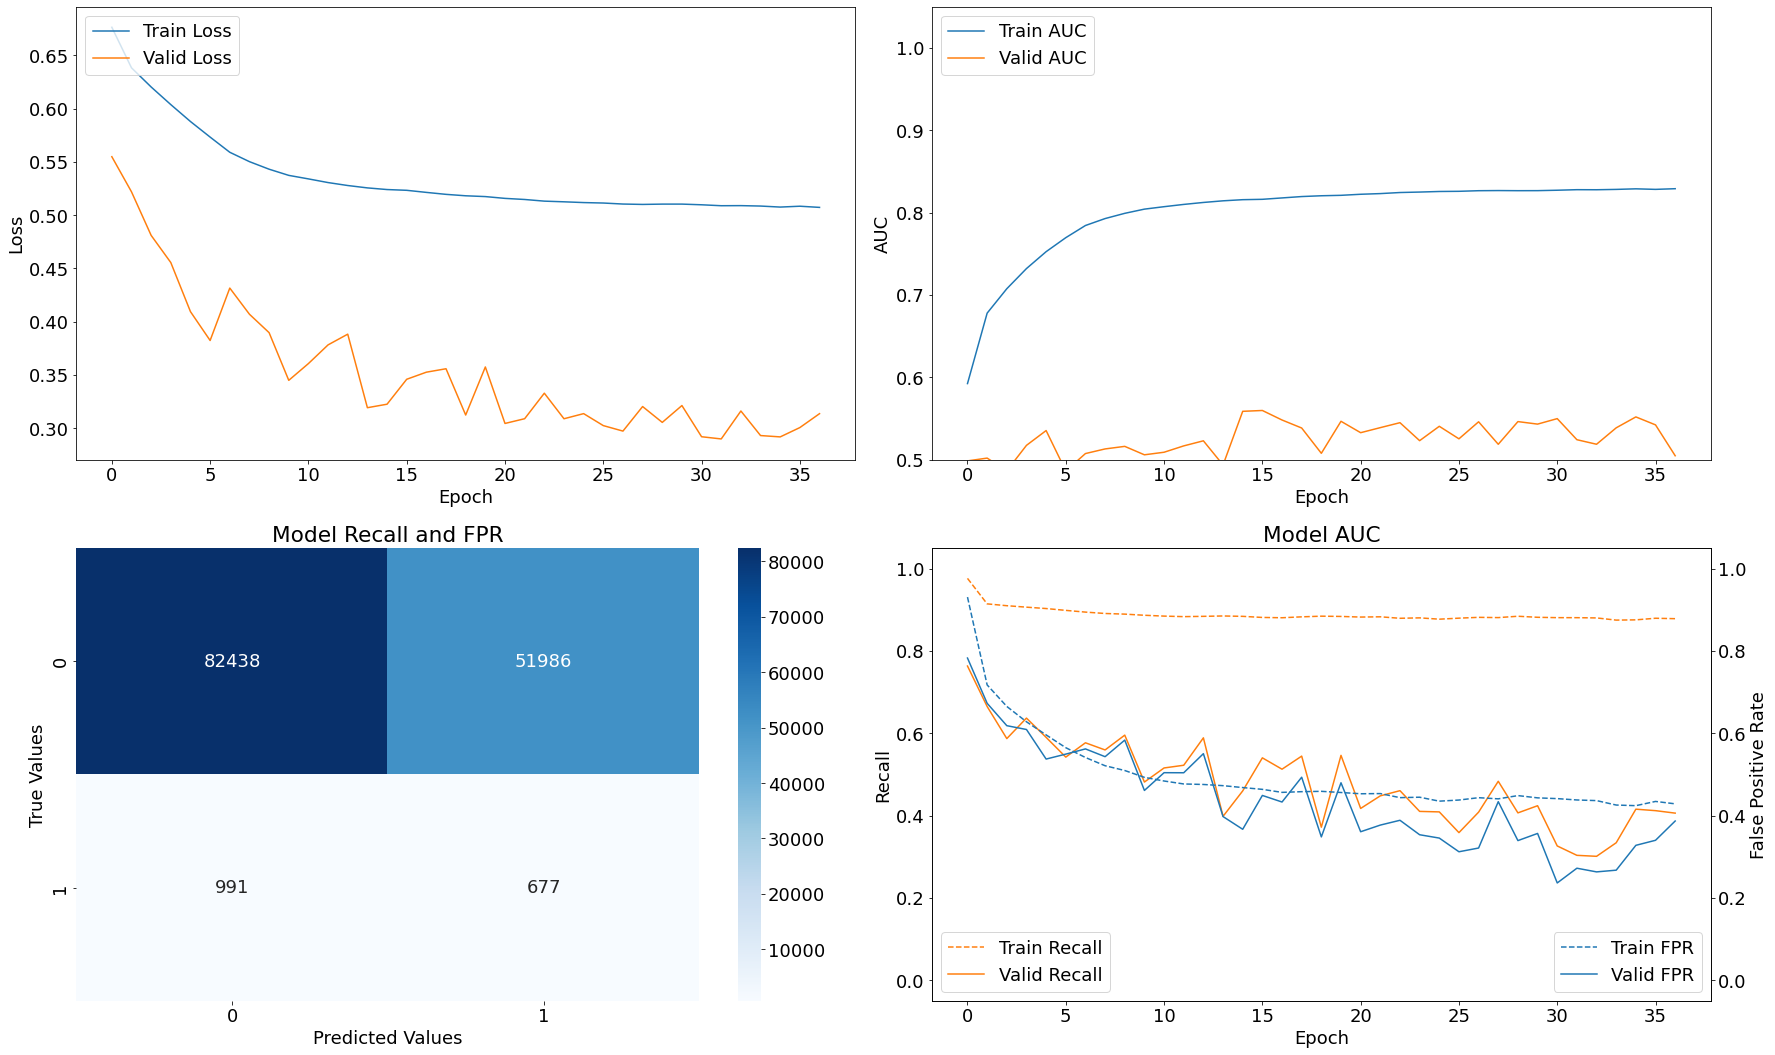

Epoch 00012: early stopping
Results for Variant V Model V5 with threshold = 0.2.

 Train f1: 0.7108557455975856 
 Val f1: 0.02404660968366082 

 Train Recall: 0.9506361484527588 
 Val Recall: 0.9526379108428955 

 Train FPR: 0.6515895128250122 
 Val FPR: 0.9589284658432007


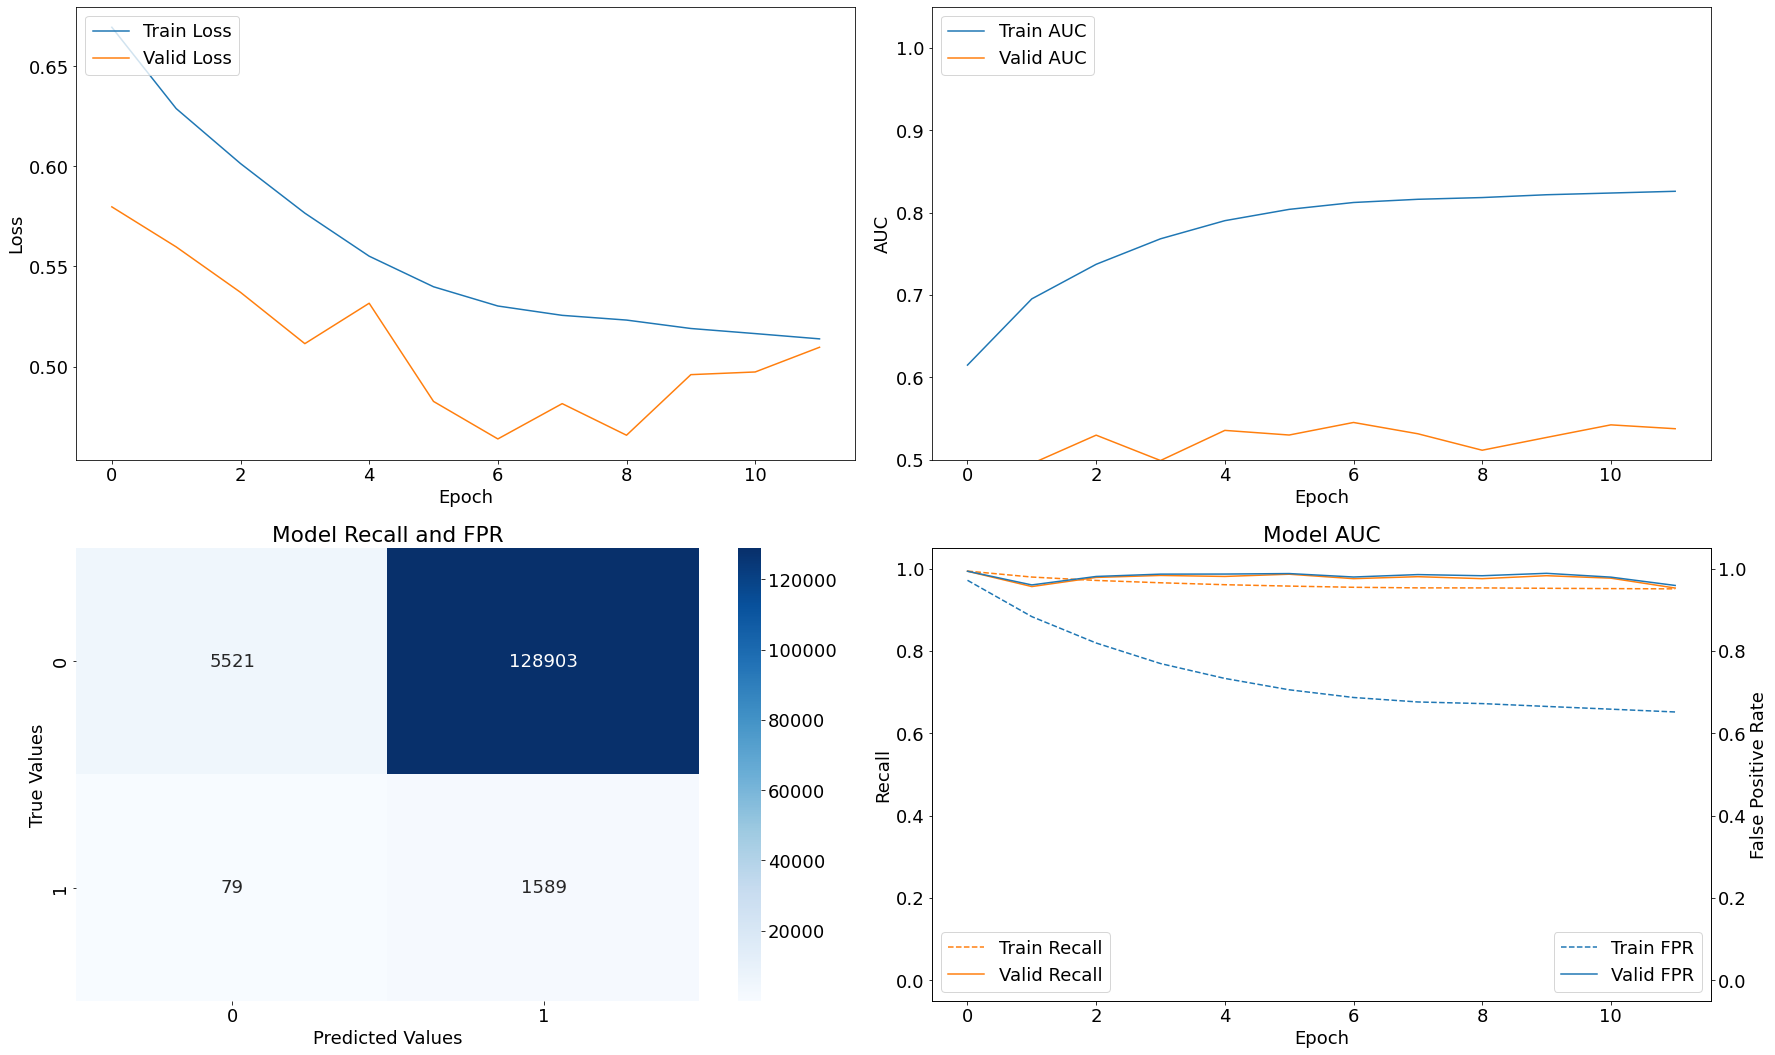

Epoch 00006: early stopping
Results for Variant V Model V5 with threshold = 0.1.

 Train f1: 0.6700858665963152 
 Val f1: 0.024206957234184312 

 Train Recall: 0.9848090410232544 
 Val Recall: 0.9994004964828491 

 Train FPR: 0.8590883612632751 
 Val FPR: 0.9997768402099609


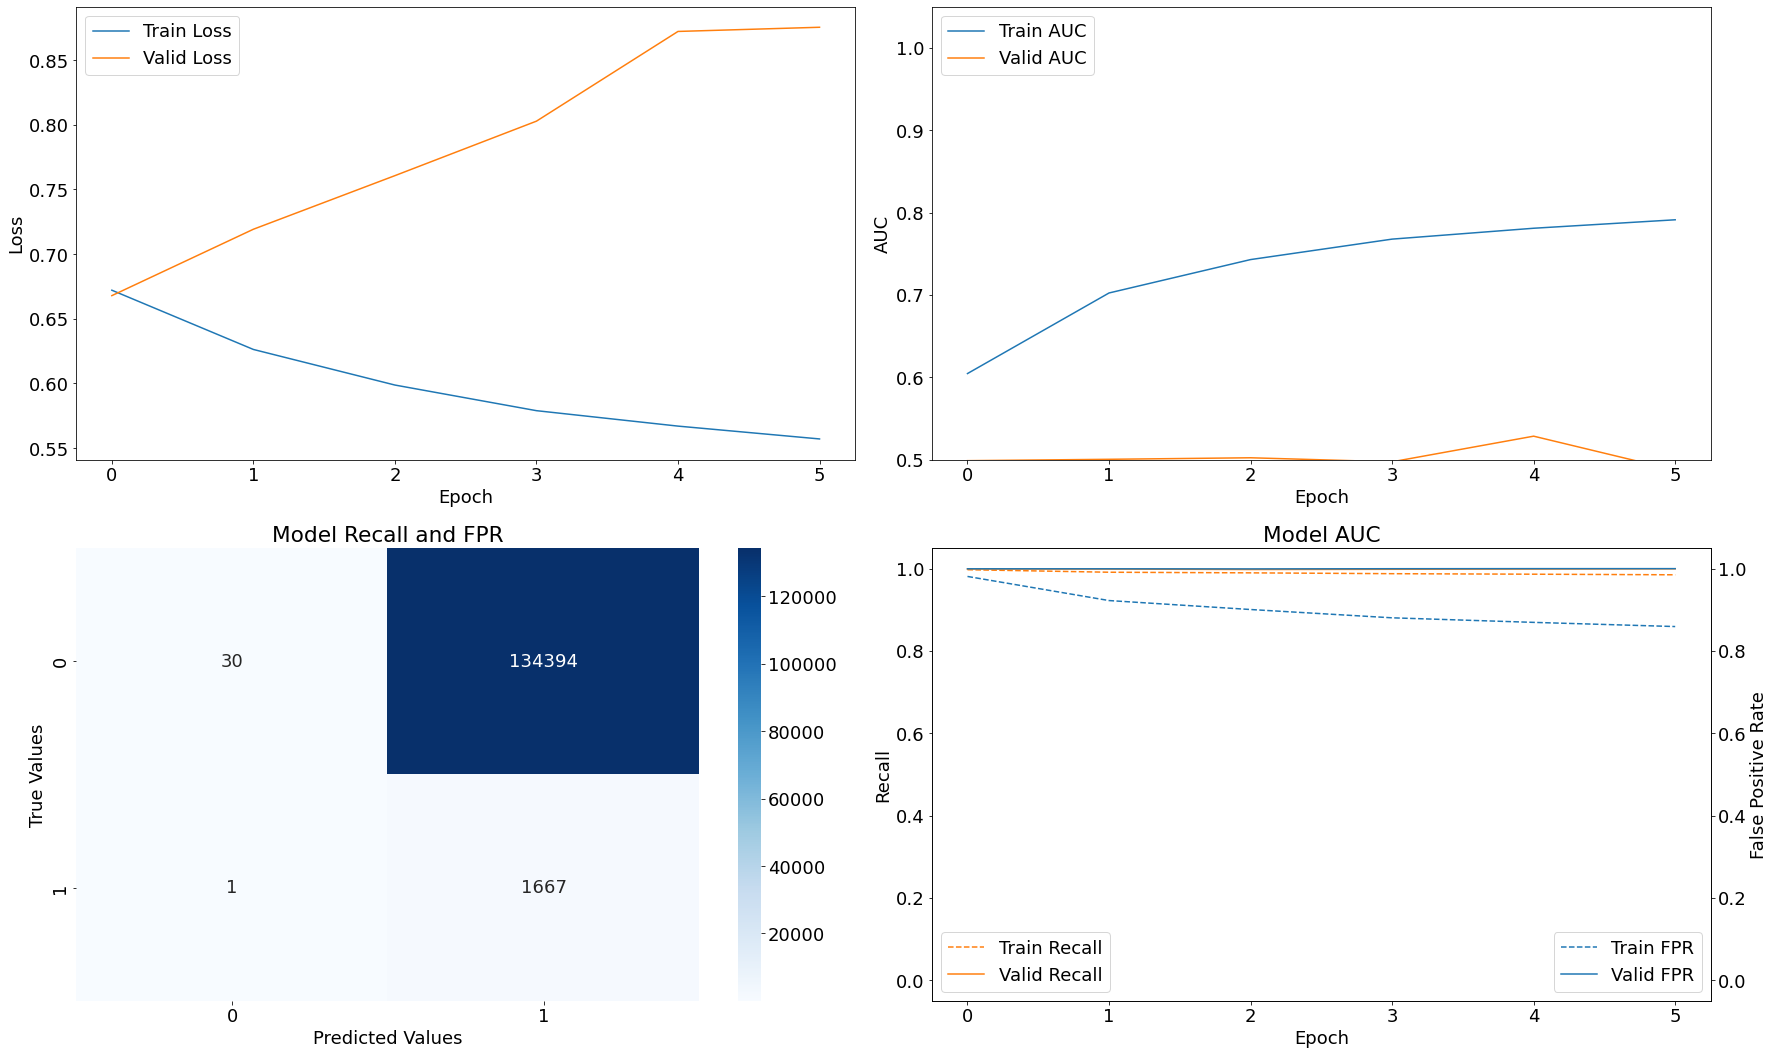

In [147]:
for t in thresholds:
    
    modelling_v5(X_train_v5_scaled_resampled,
                 y_train_v5_resampled,
                 X_val_v5_scaled,
                 y_val_v5,
                 'Variant V Model V5',
                 threshold=t)

---

### Sixth Model Iteration

In [148]:
def modelling_v6(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):     
    
    model_v6 = models.Sequential()

    model_v6.add(layers.Input(shape=(n_features, )))
    model_v6.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(1, activation='sigmoid'))

    model_v6.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v6_history = model_v6.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v6,
             name,
             model_v6_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Variant V Model V6 with threshold = 0.5.

 Train f1: 0.7394829372634844 
 Val f1: 0.024858894546139713 

 Train Recall: 0.7753967642784119 
 Val Recall: 0.8555155992507935 

 Train FPR: 0.2895618677139282 
 Val FPR: 0.8310495018959045


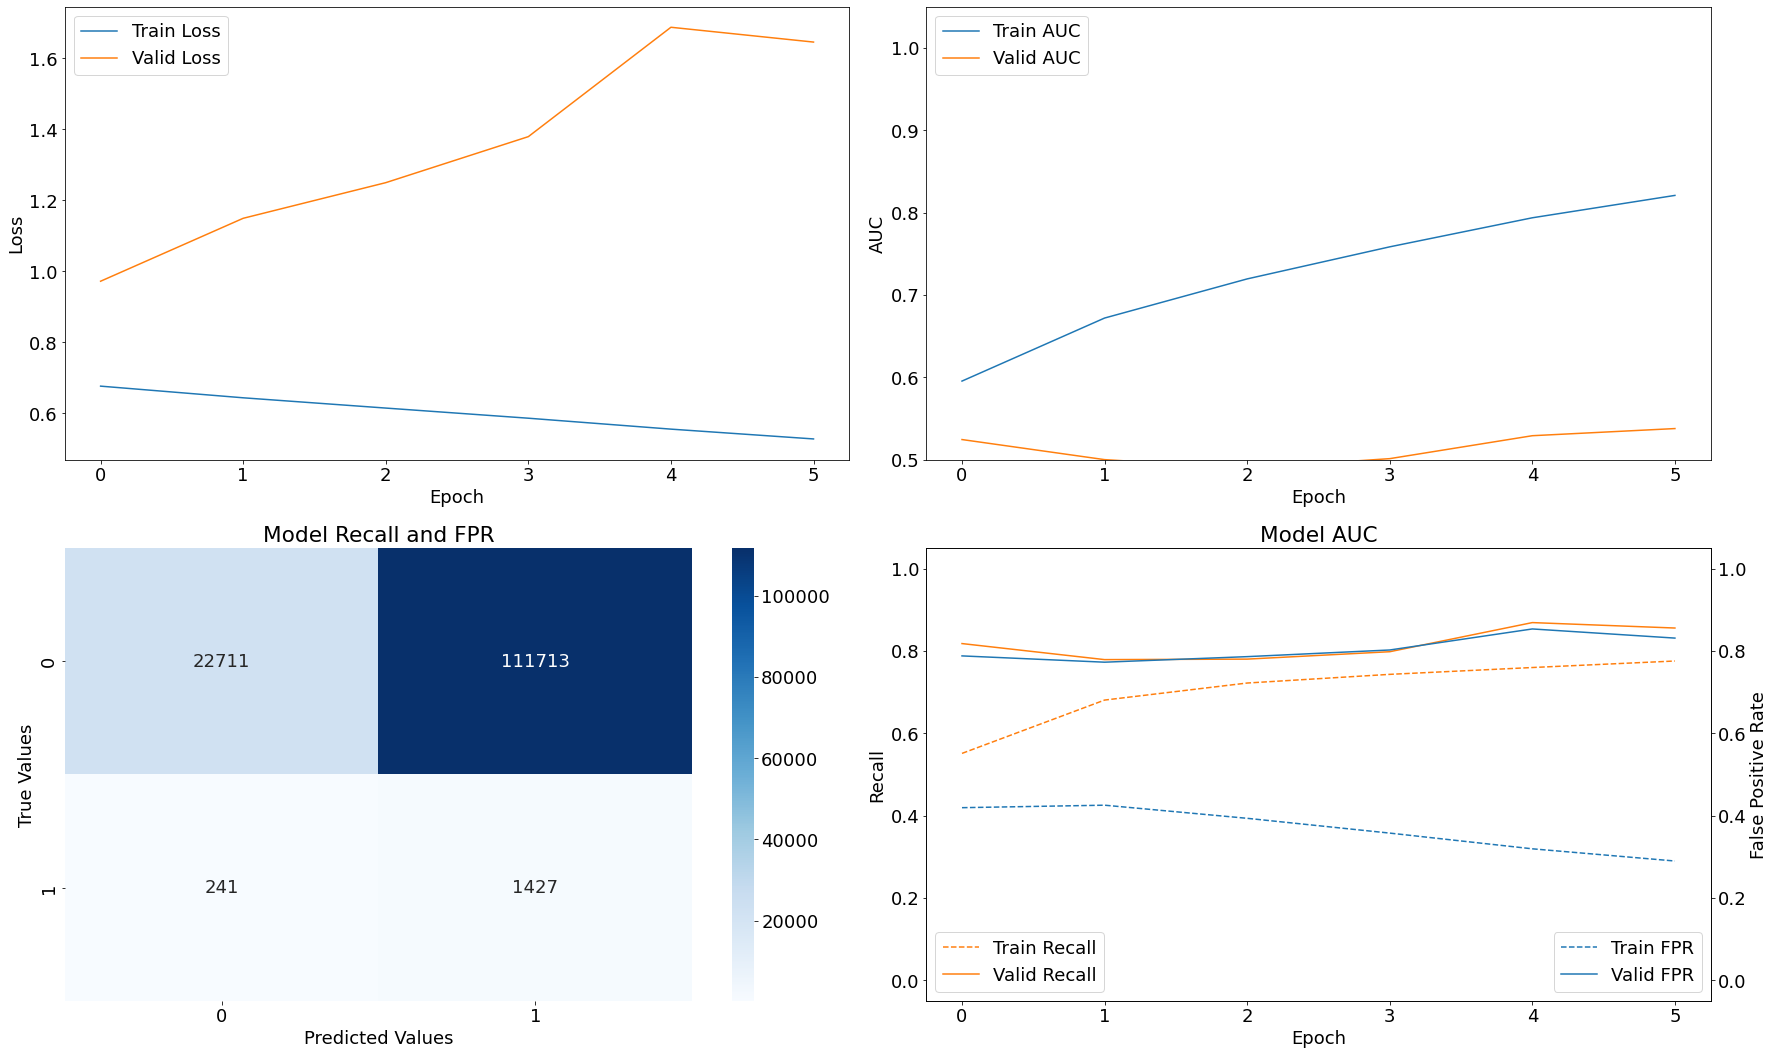

Epoch 00017: early stopping
Results for Variant V Model V6 with threshold = 0.4.

 Train f1: 0.7866267269818163 
 Val f1: 0.03907858949766079 

 Train Recall: 0.8025845885276794 
 Val Recall: 0.24460431933403015 

 Train FPR: 0.21418942511081696 
 Val FPR: 0.13989317417144775


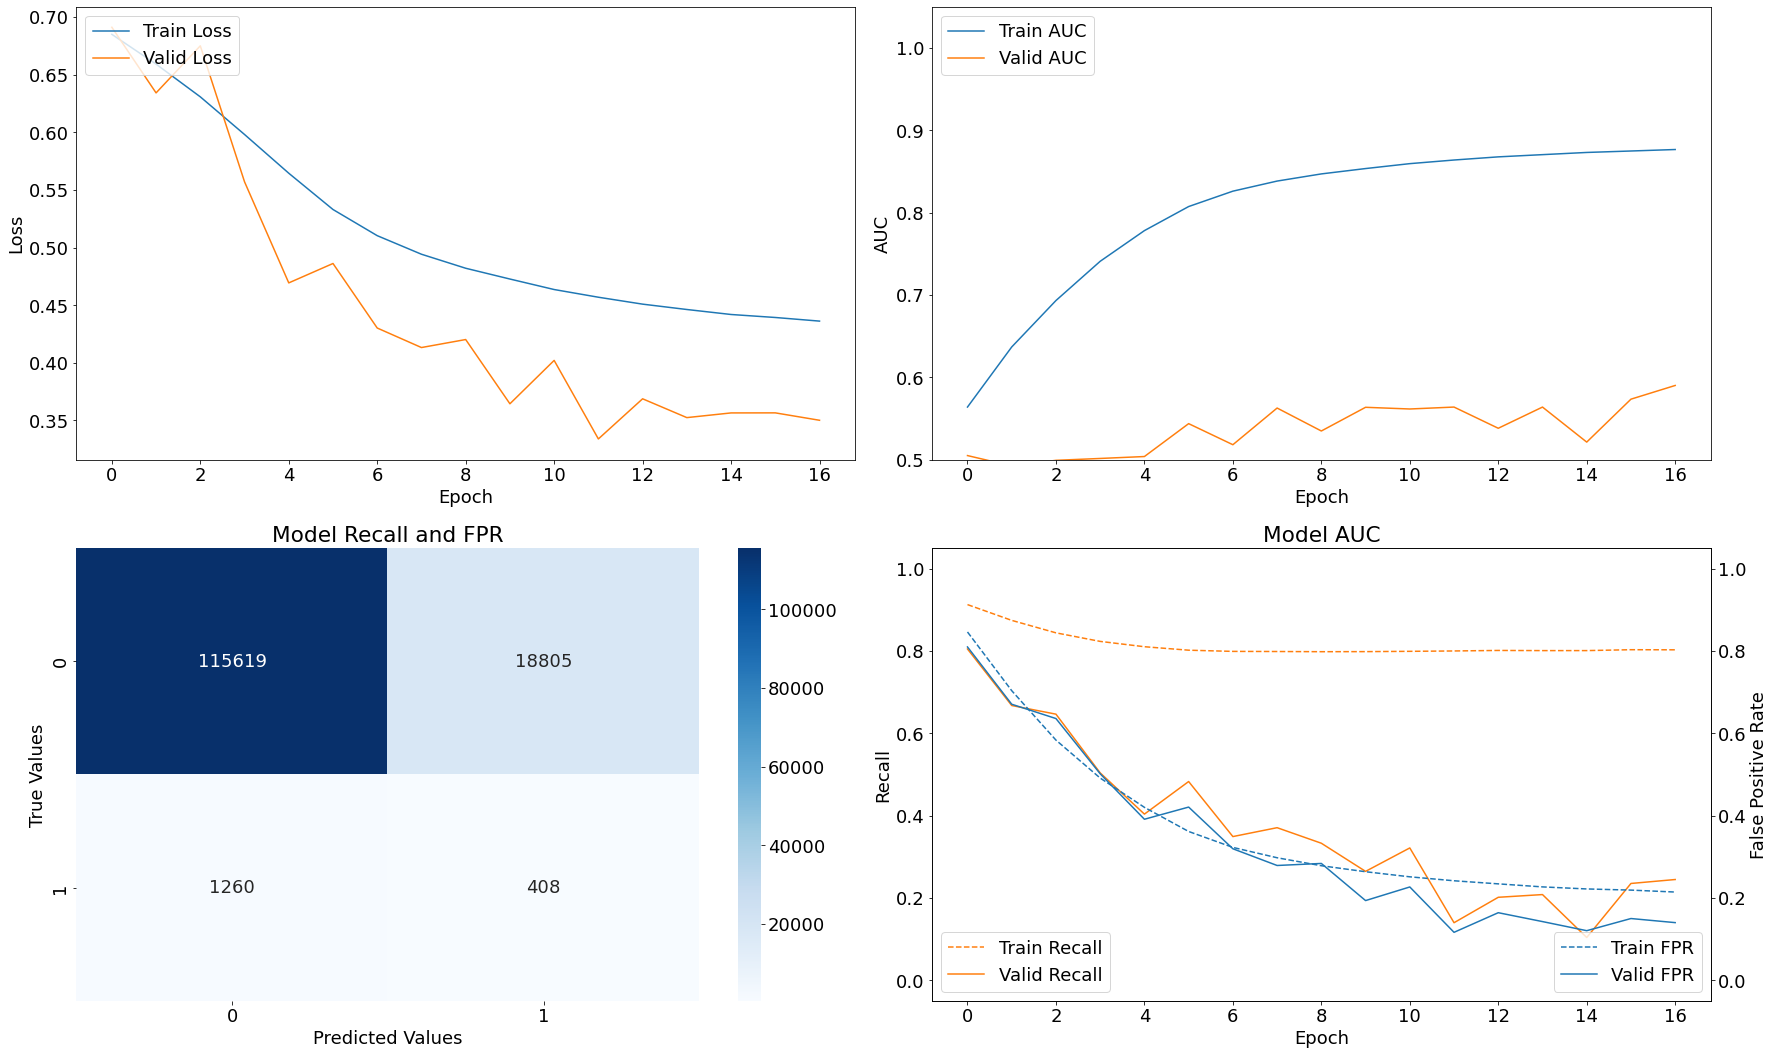

Epoch 00006: early stopping
Results for Variant V Model V6 with threshold = 0.3.

 Train f1: 0.728577081920928 
 Val f1: 0.02394851345126102 

 Train Recall: 0.9031804203987122 
 Val Recall: 0.8399280309677124 

 Train FPR: 0.5185071229934692 
 Val FPR: 0.847557008266449


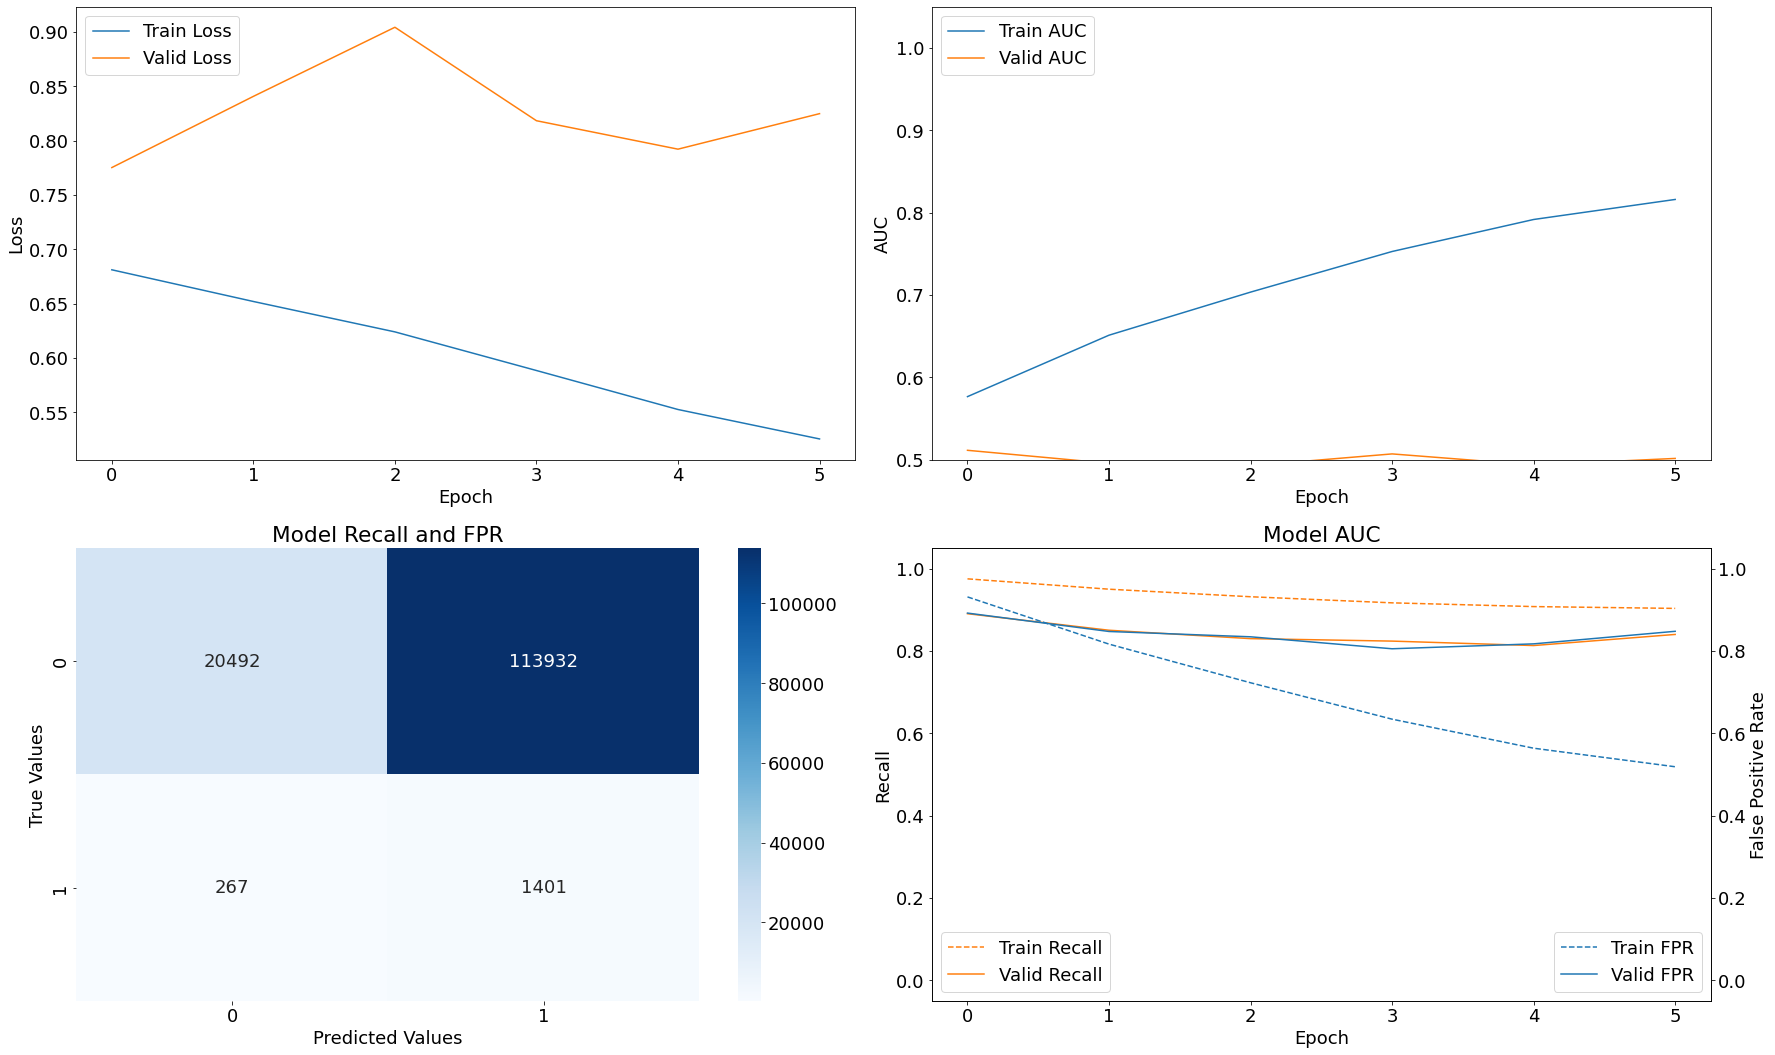

Epoch 00016: early stopping
Results for Variant V Model V6 with threshold = 0.2.

 Train f1: 0.7419635131143372 
 Val f1: 0.02399187245701286 

 Train Recall: 0.9404836893081665 
 Val Recall: 0.9202637672424316 

 Train FPR: 0.5351735949516296 
 Val FPR: 0.9280857443809509


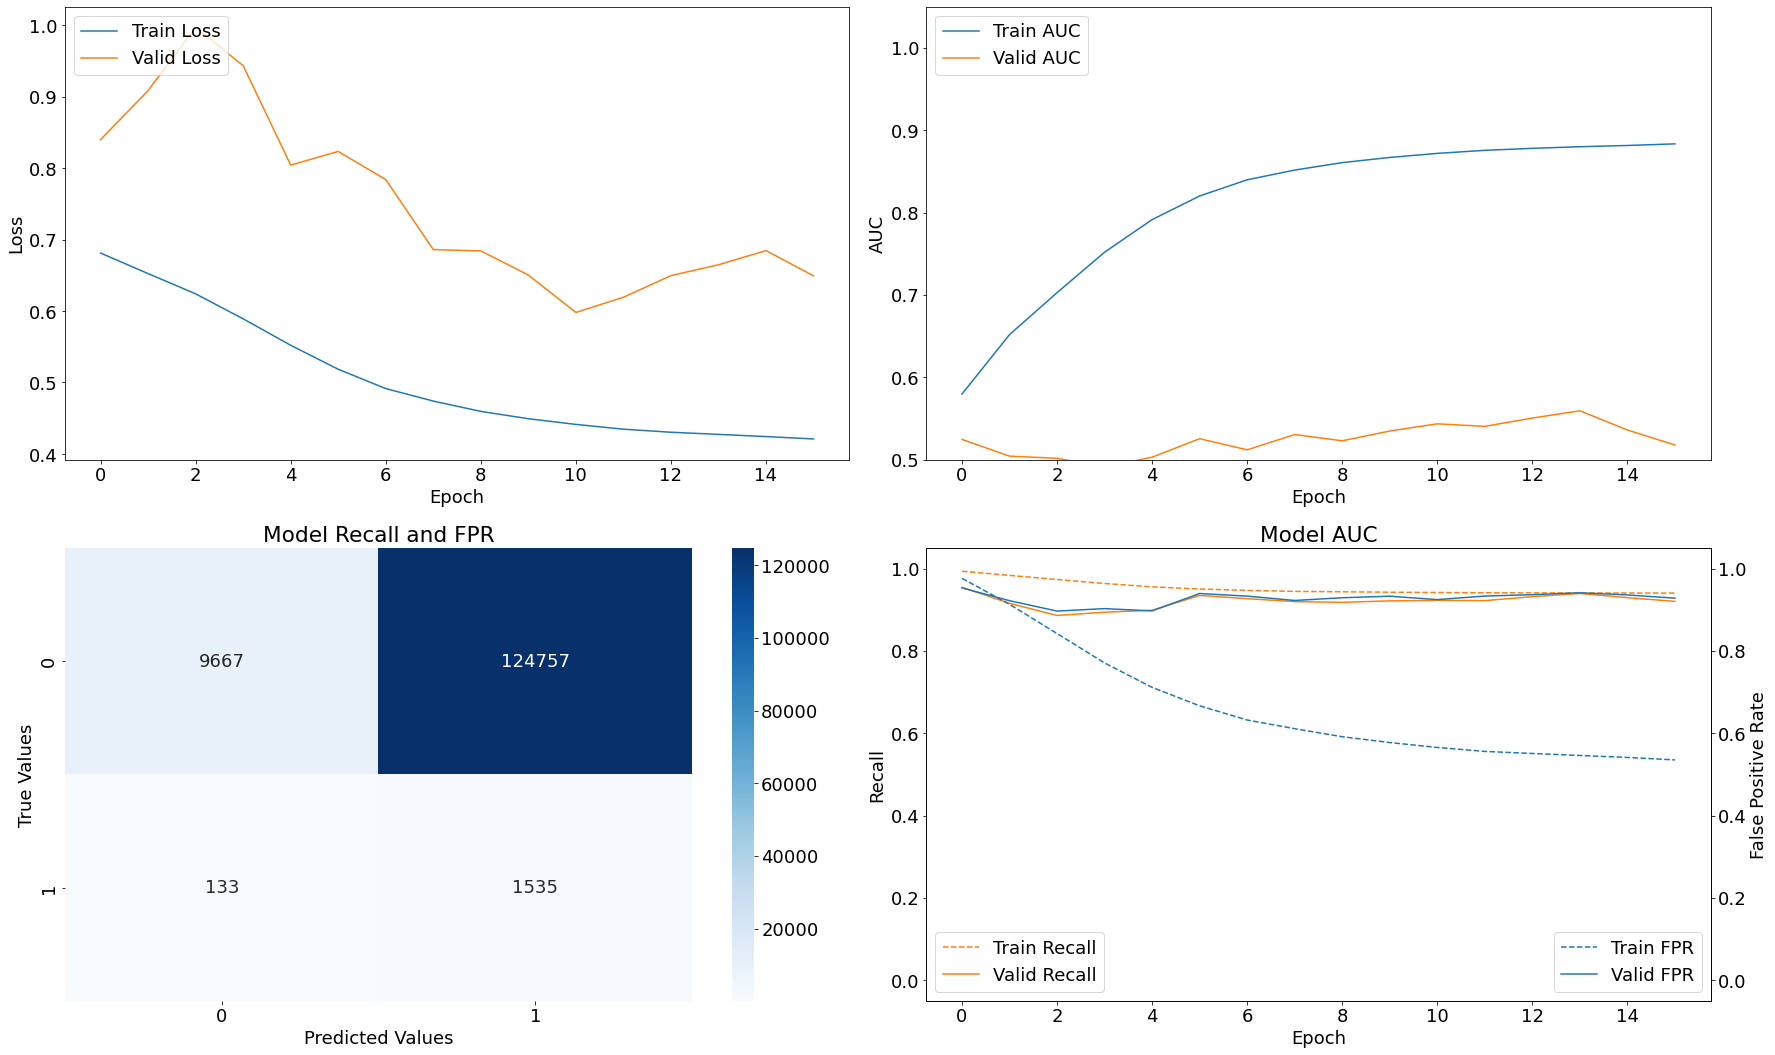

Epoch 00012: early stopping
Results for Variant V Model V6 with threshold = 0.1.

 Train f1: 0.6839990762273233 
 Val f1: 0.024493676672415515 

 Train Recall: 0.9850194454193115 
 Val Recall: 0.9574340581893921 

 Train FPR: 0.805642306804657 
 Val FPR: 0.9457834959030151


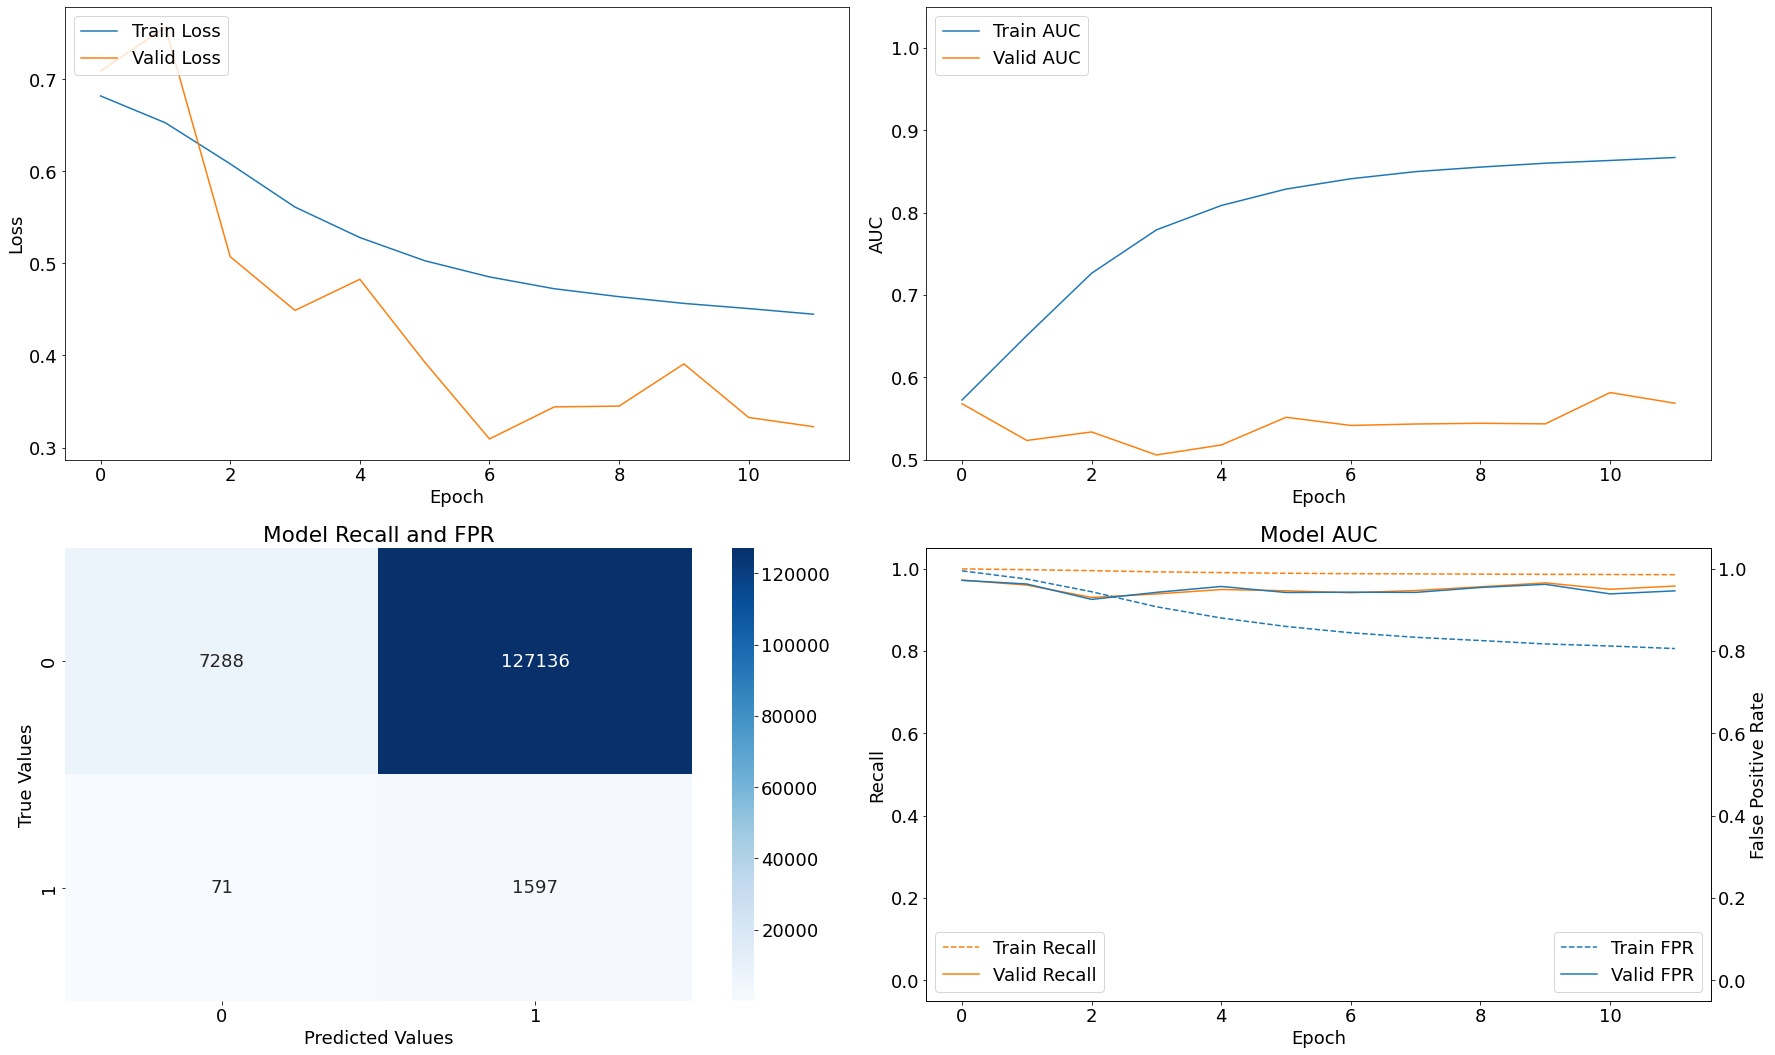

In [149]:
for t in thresholds:
    
    modelling_v6(X_train_v5_scaled_resampled,
                 y_train_v5_resampled,
                 X_val_v5_scaled,
                 y_val_v5,
                 'Variant V Model V6',
                 threshold=t)

---

### Seventh Model Iteration

In [150]:
def modelling_v7(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5): 

    model_v7 = models.Sequential()

    model_v7.add(layers.Input(shape=(n_features, )))
    model_v7.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(1, activation='sigmoid'))

    model_v7.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v7_history = model_v7.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v7,
             name,
             model_v7_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00011: early stopping
Results for Variant V Model V7 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 9.333222988061607e-05 
 Val Recall: 0.0 

 Train FPR: 7.066581747494638e-05 
 Val FPR: 0.0


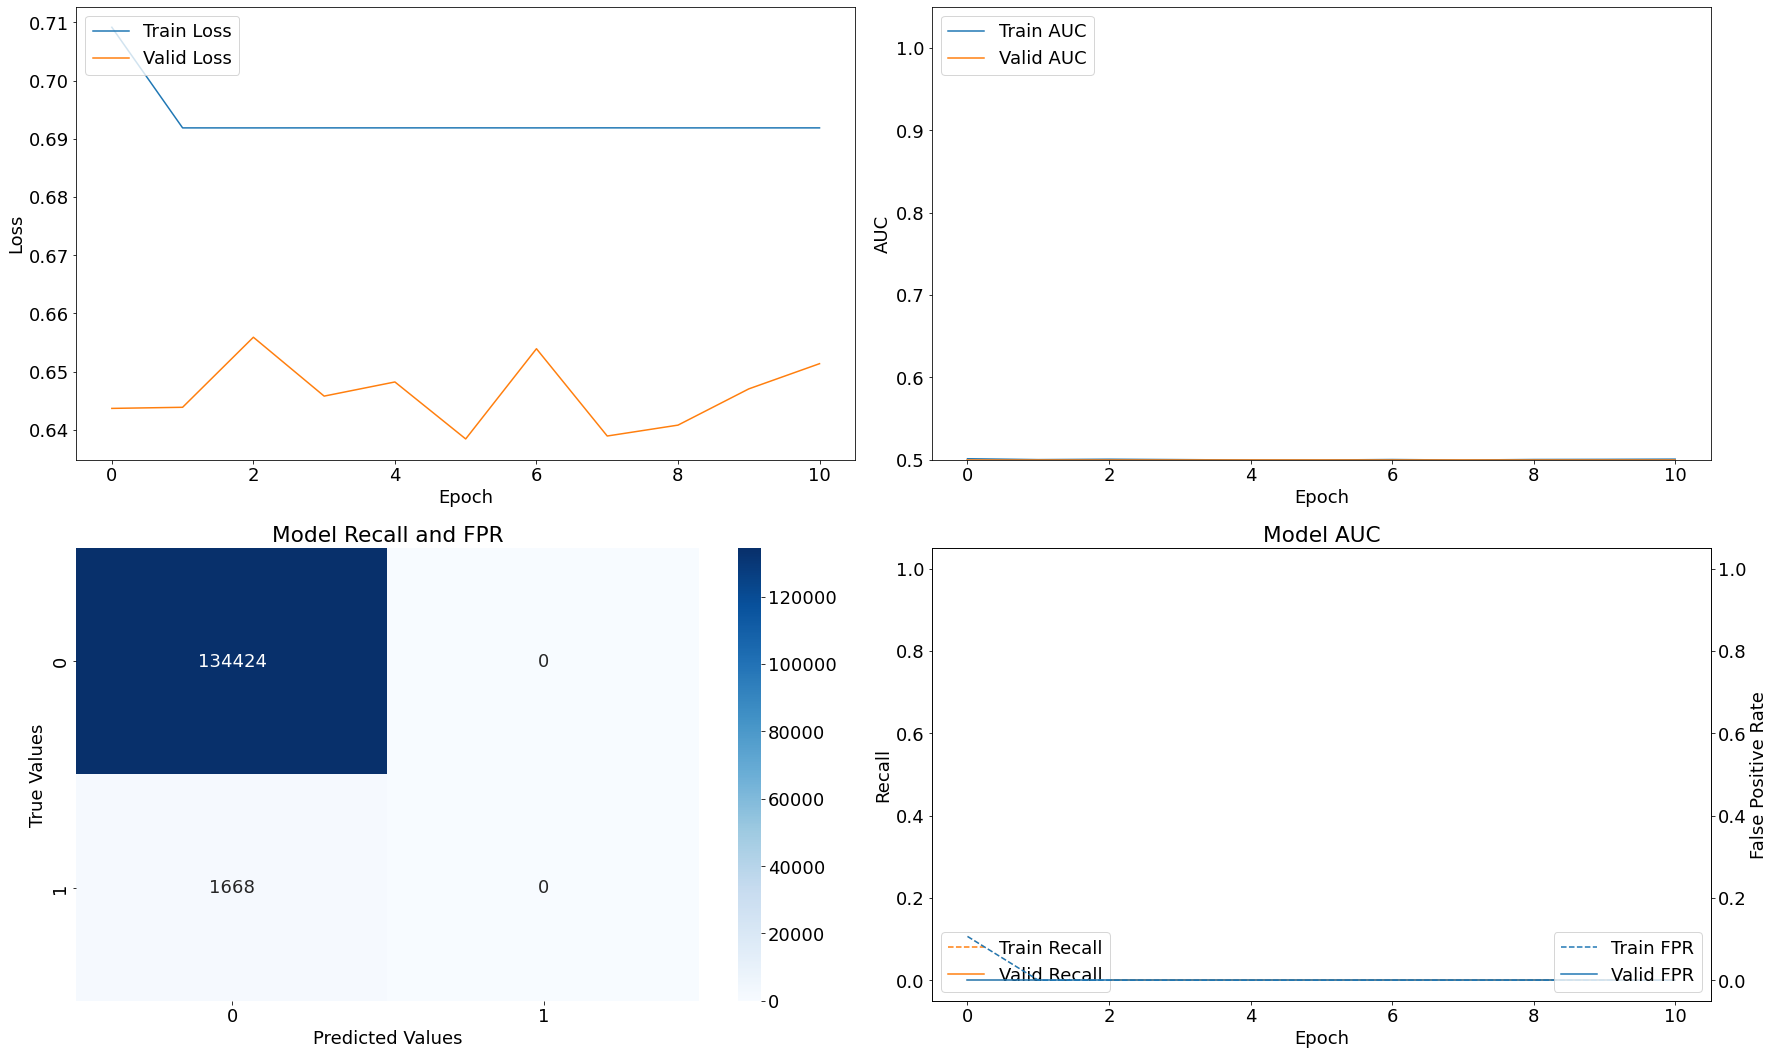

Epoch 00008: early stopping
Results for Variant V Model V7 with threshold = 0.4.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


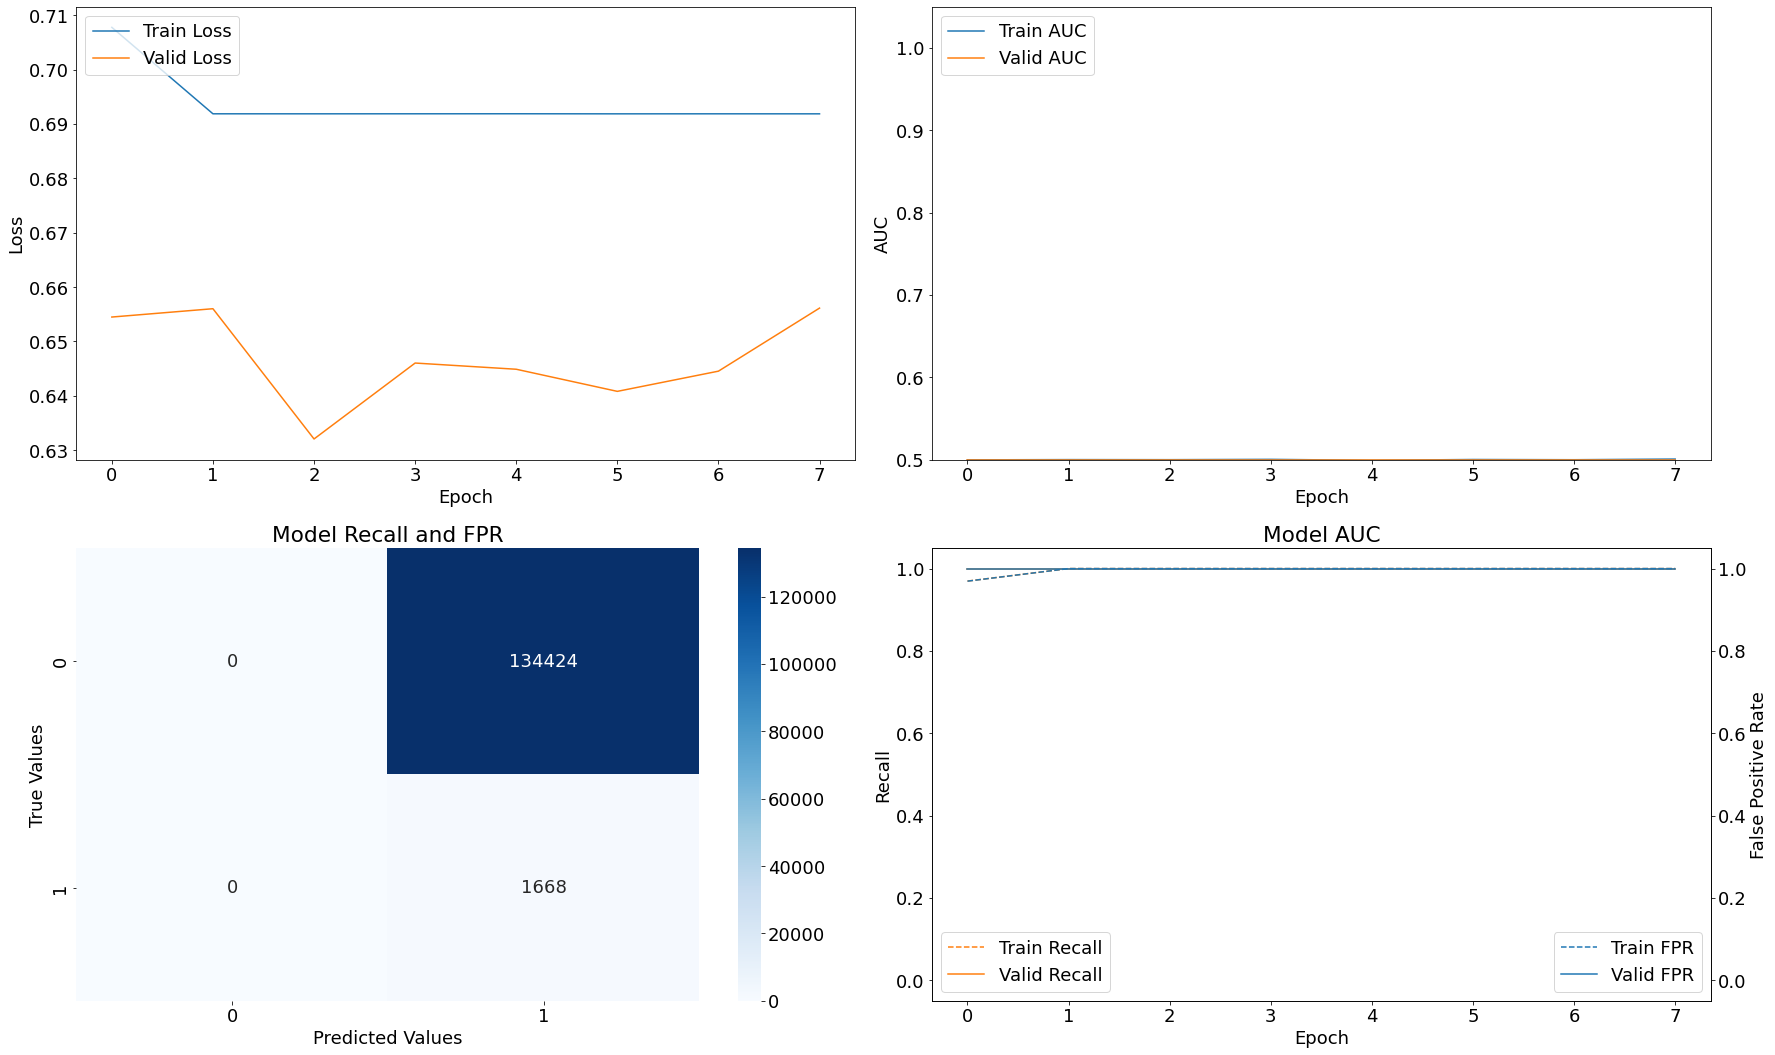

Epoch 00009: early stopping
Results for Variant V Model V7 with threshold = 0.3.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


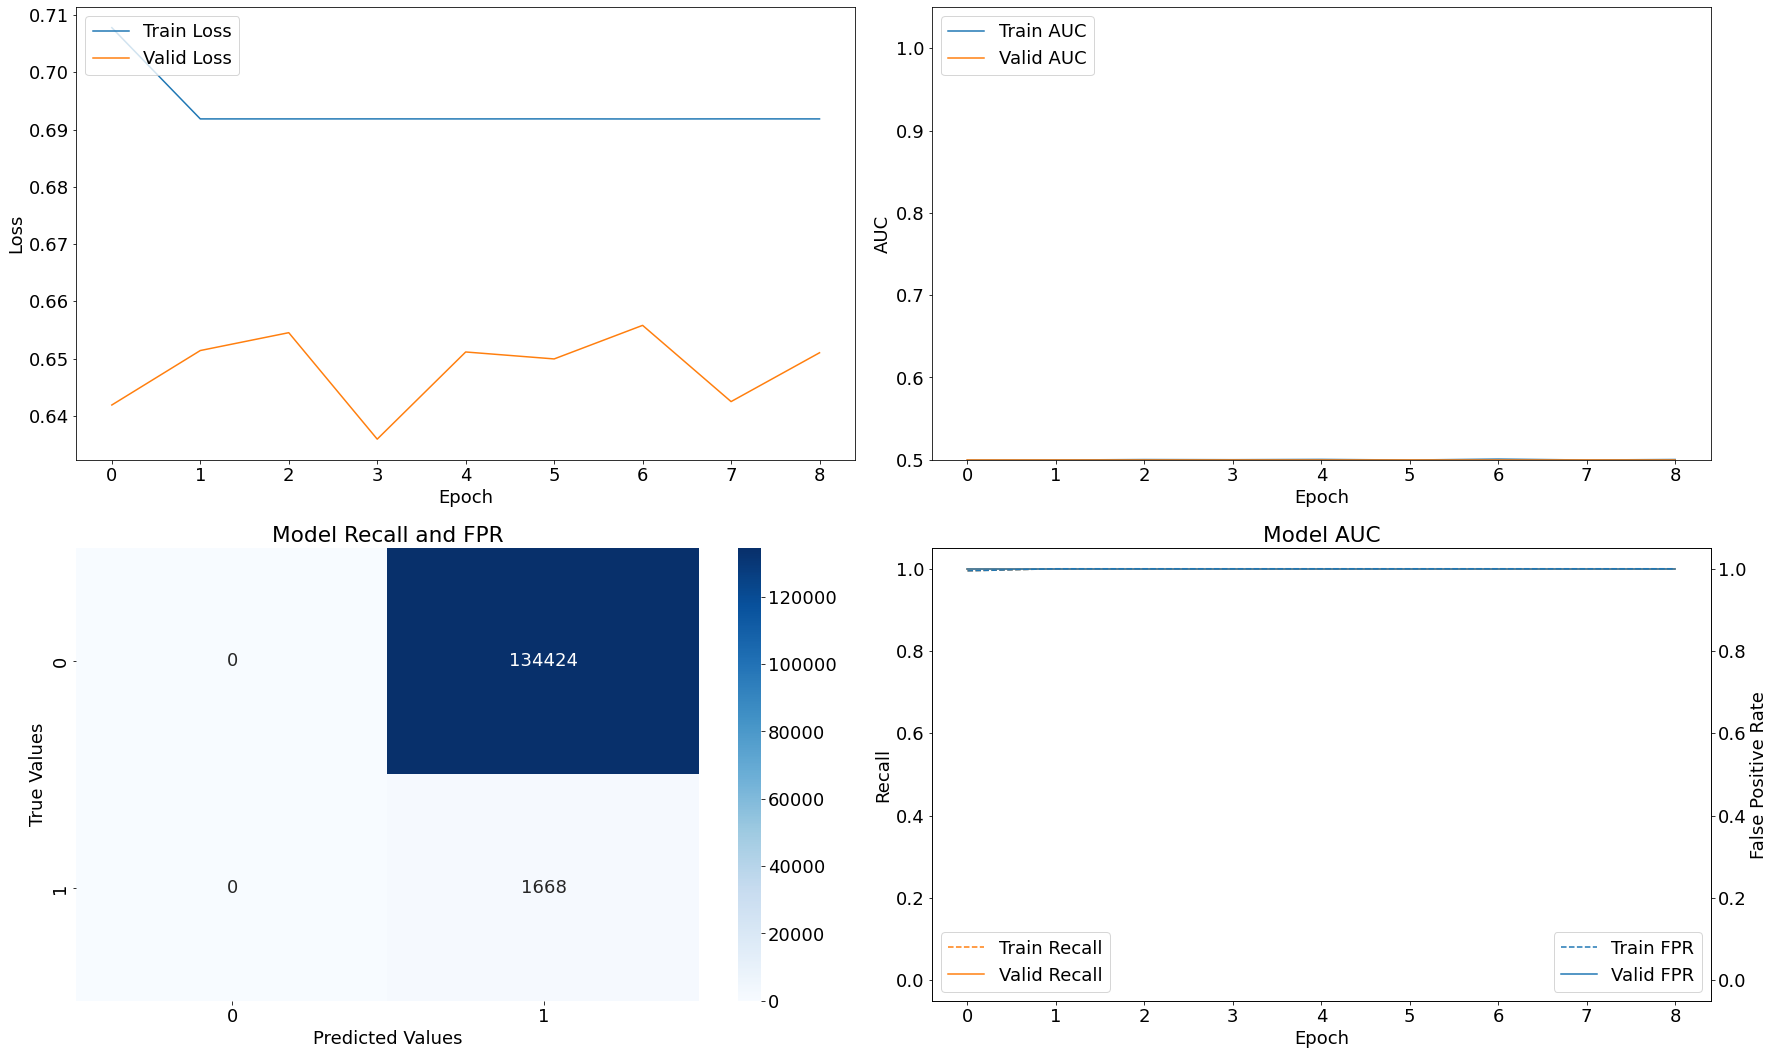

Epoch 00011: early stopping
Results for Variant V Model V7 with threshold = 0.2.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


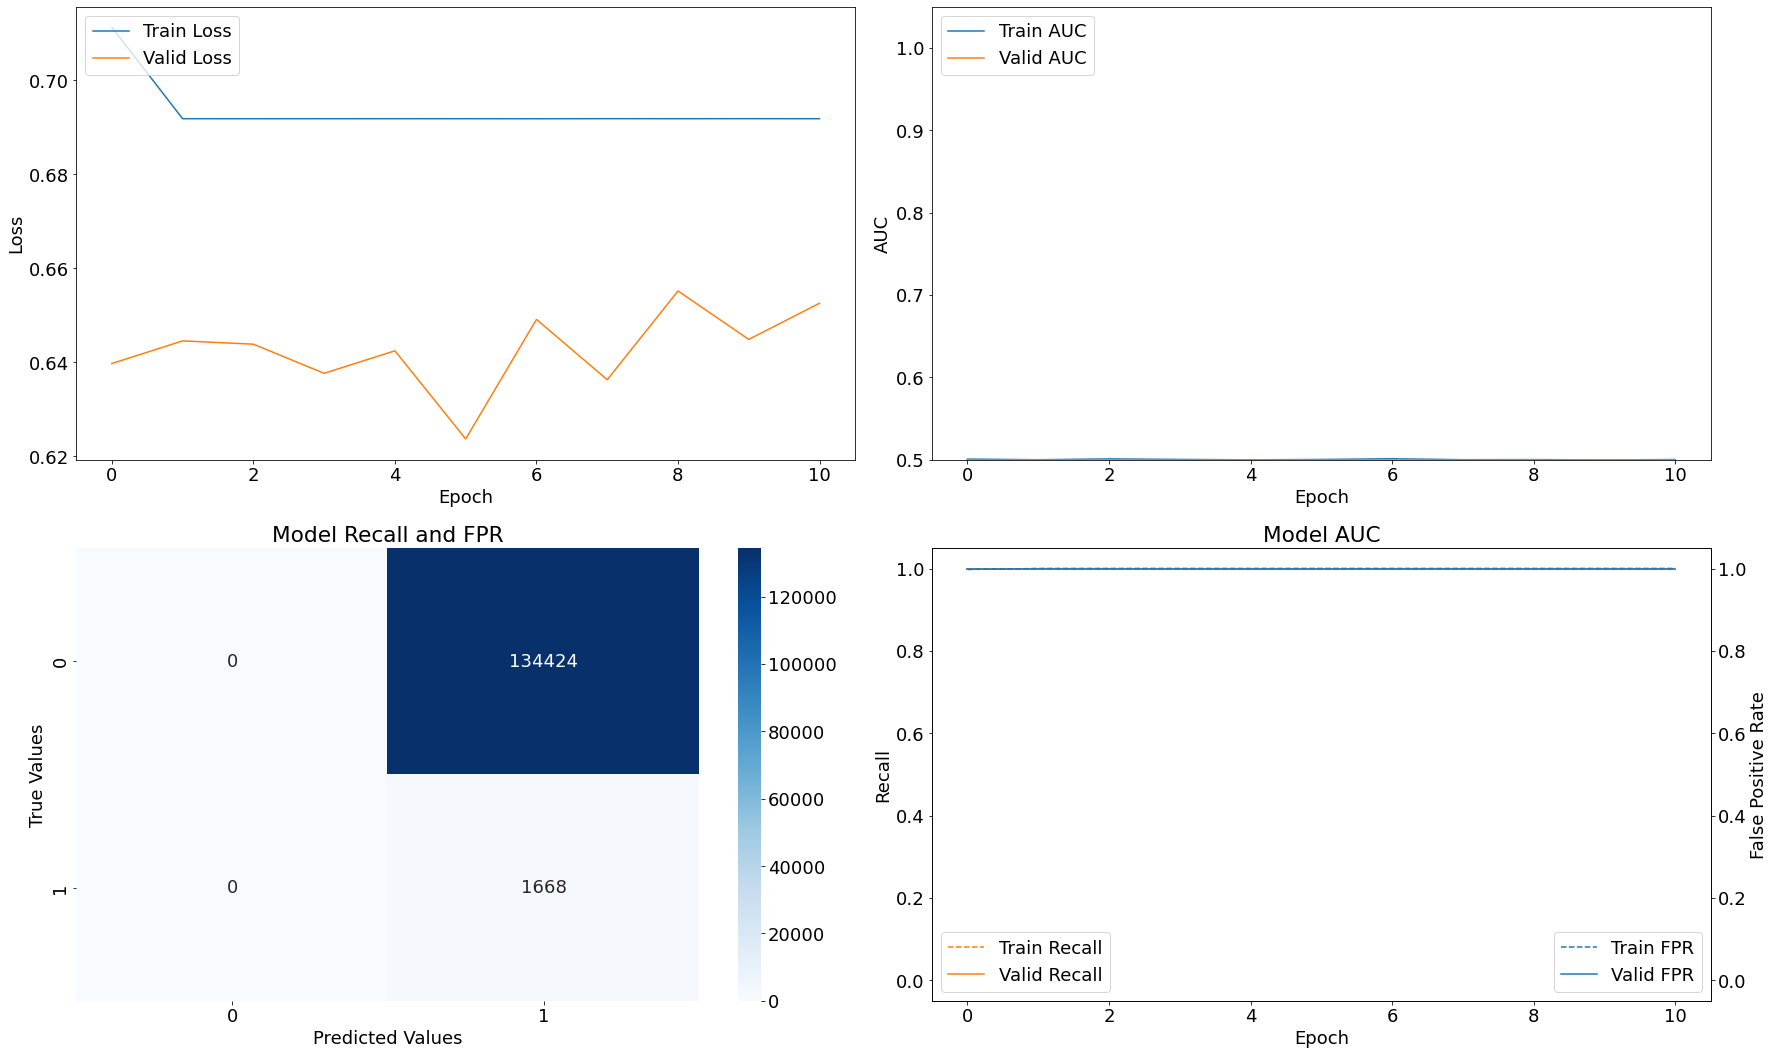

Epoch 00006: early stopping
Results for Variant V Model V7 with threshold = 0.1.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


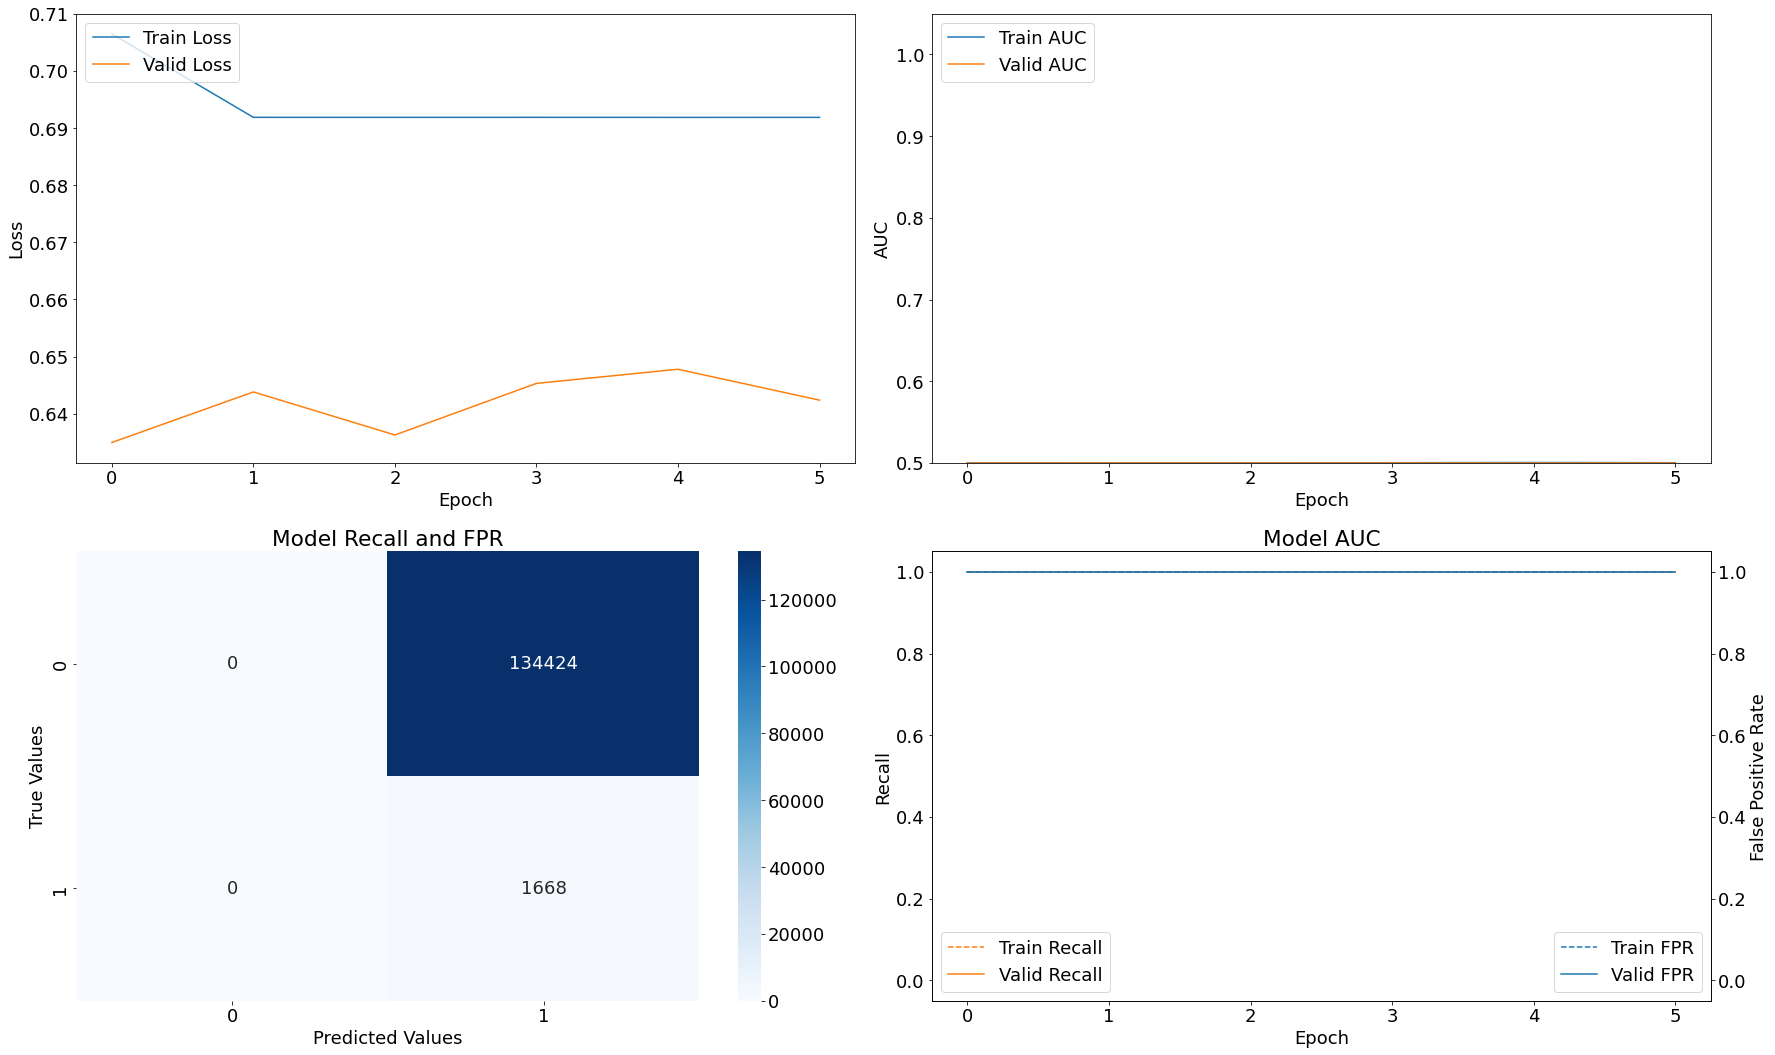

In [151]:
for t in thresholds:
    
    modelling_v7(X_train_v5_scaled_resampled,
                 y_train_v5_resampled,
                 X_val_v5_scaled,
                 y_val_v5,
                 'Variant V Model V7',
                 threshold=t)

---

### Eighth Model Iteration

In [7]:
def modelling_v8(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):   
    
    model_v8 = models.Sequential()

    model_v8.add(layers.Input(shape=(n_features, )))
    model_v8.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.Dense(1, activation='sigmoid'))

    model_v8.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v8_history = model_v8.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    verbose=0).history
    
    evaluate(model_v8,
             name,
             model_v8_history,
             X_val,
             y_val,
             threshold=threshold)

Results for Variant V Model V8 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


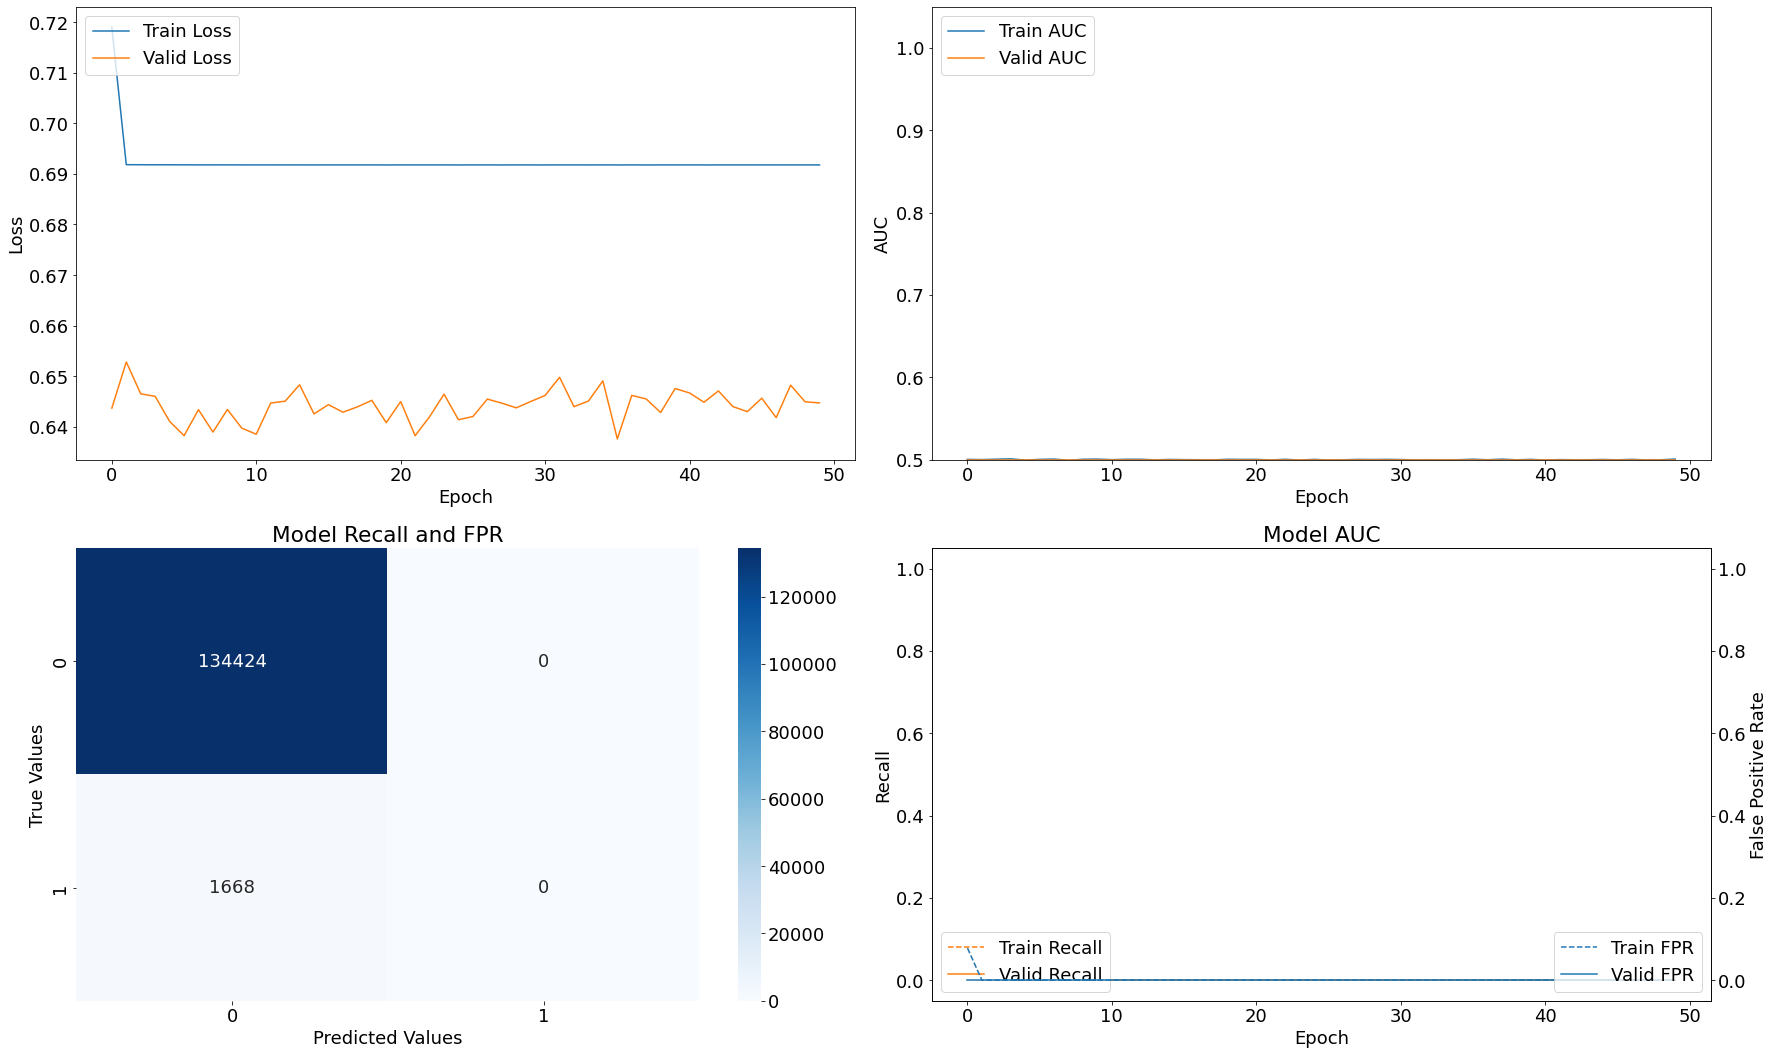

Results for Variant V Model V8 with threshold = 0.4.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


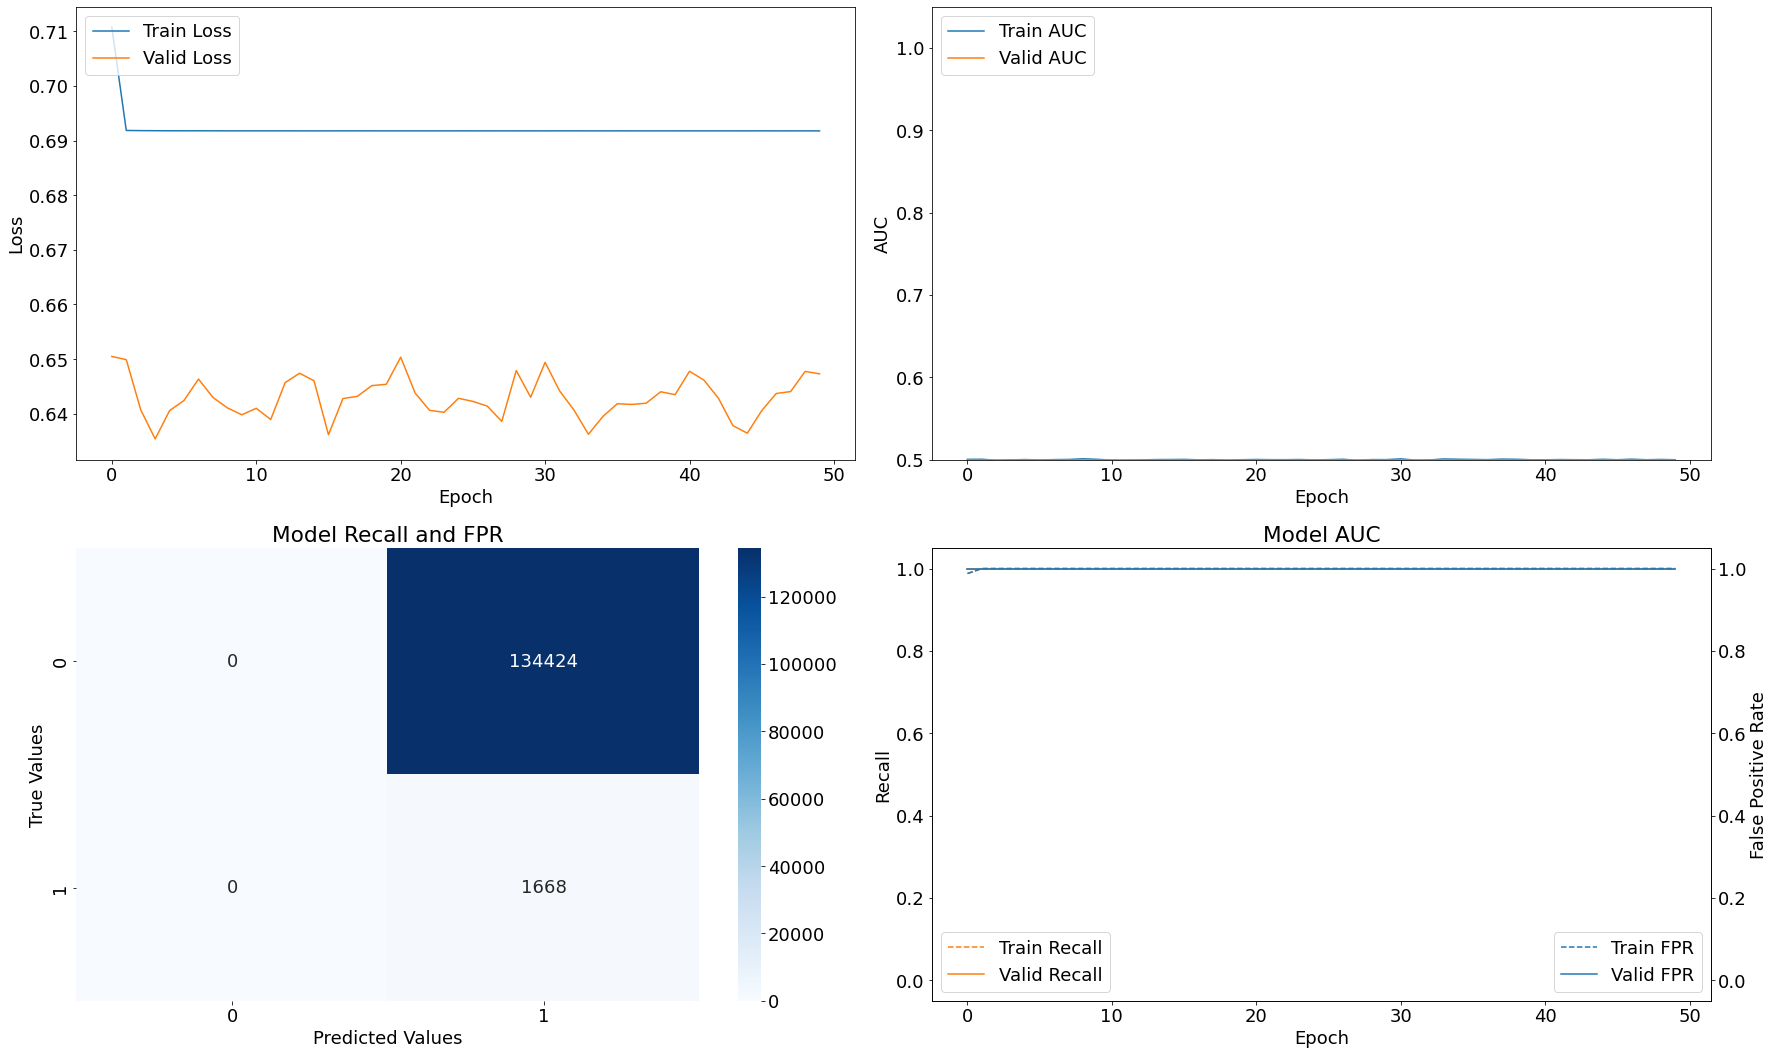

Results for Variant V Model V8 with threshold = 0.3.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


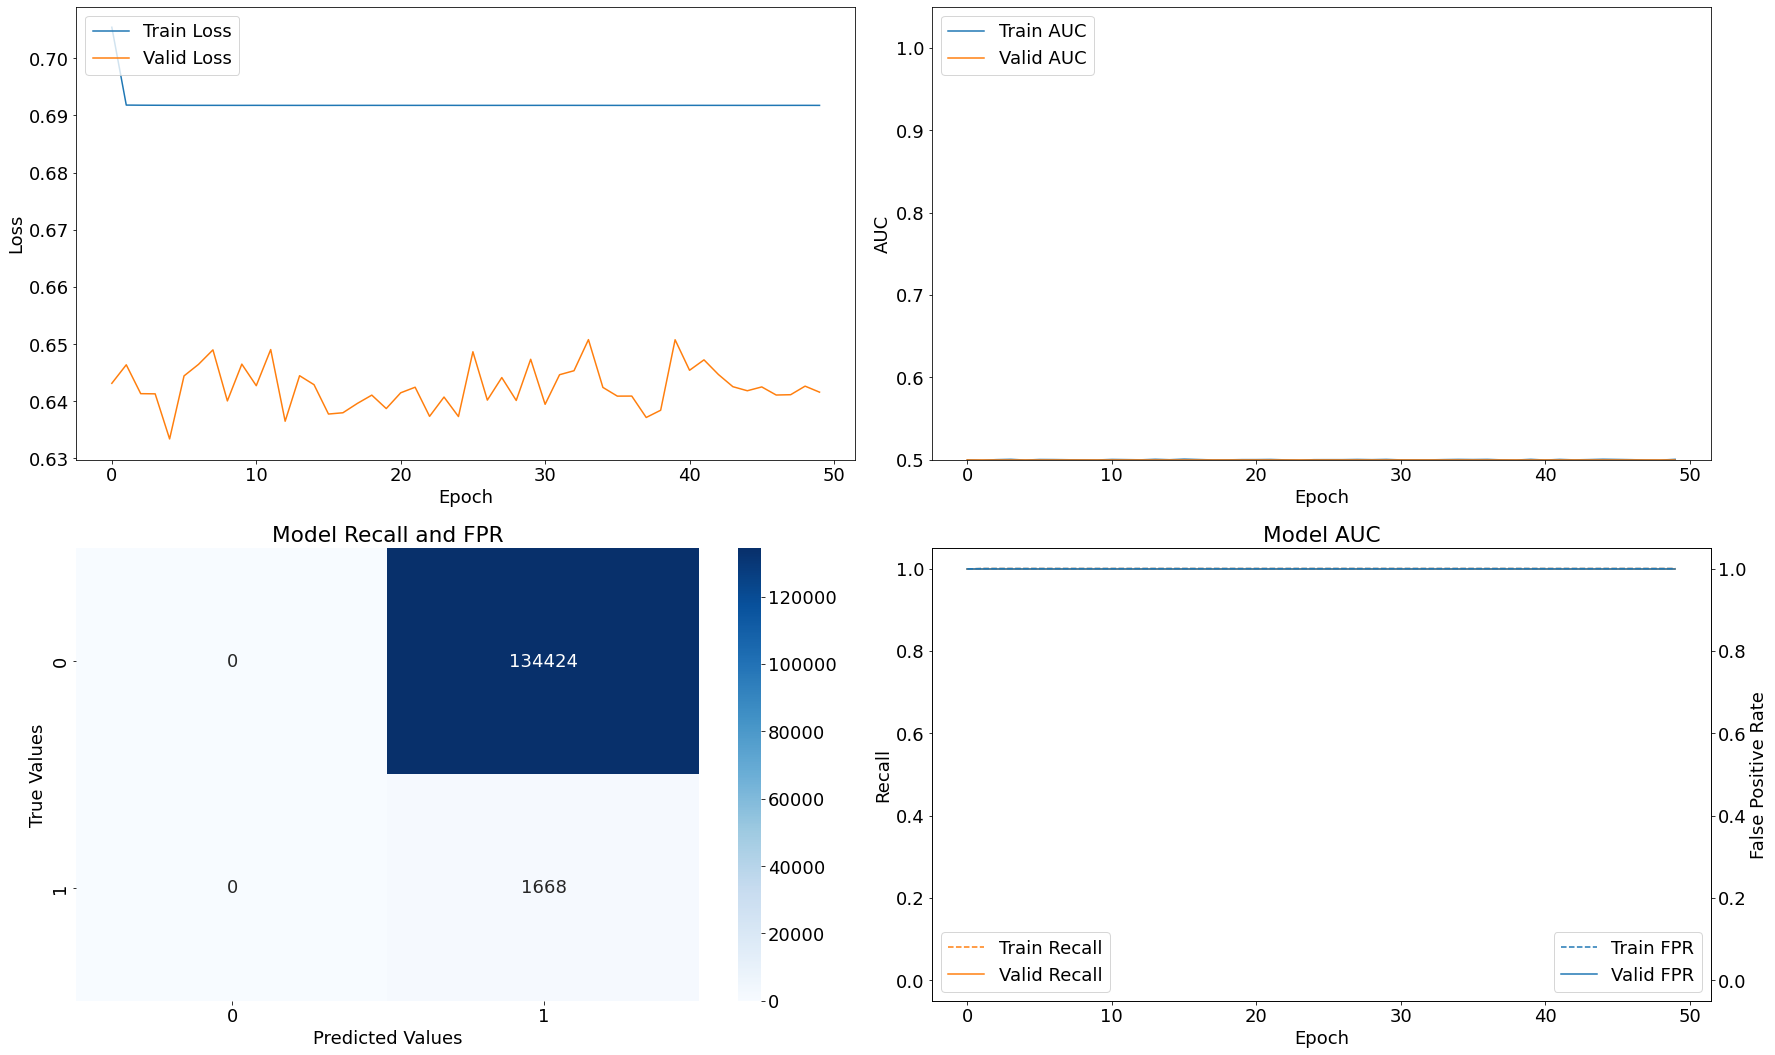

Results for Variant V Model V8 with threshold = 0.2.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


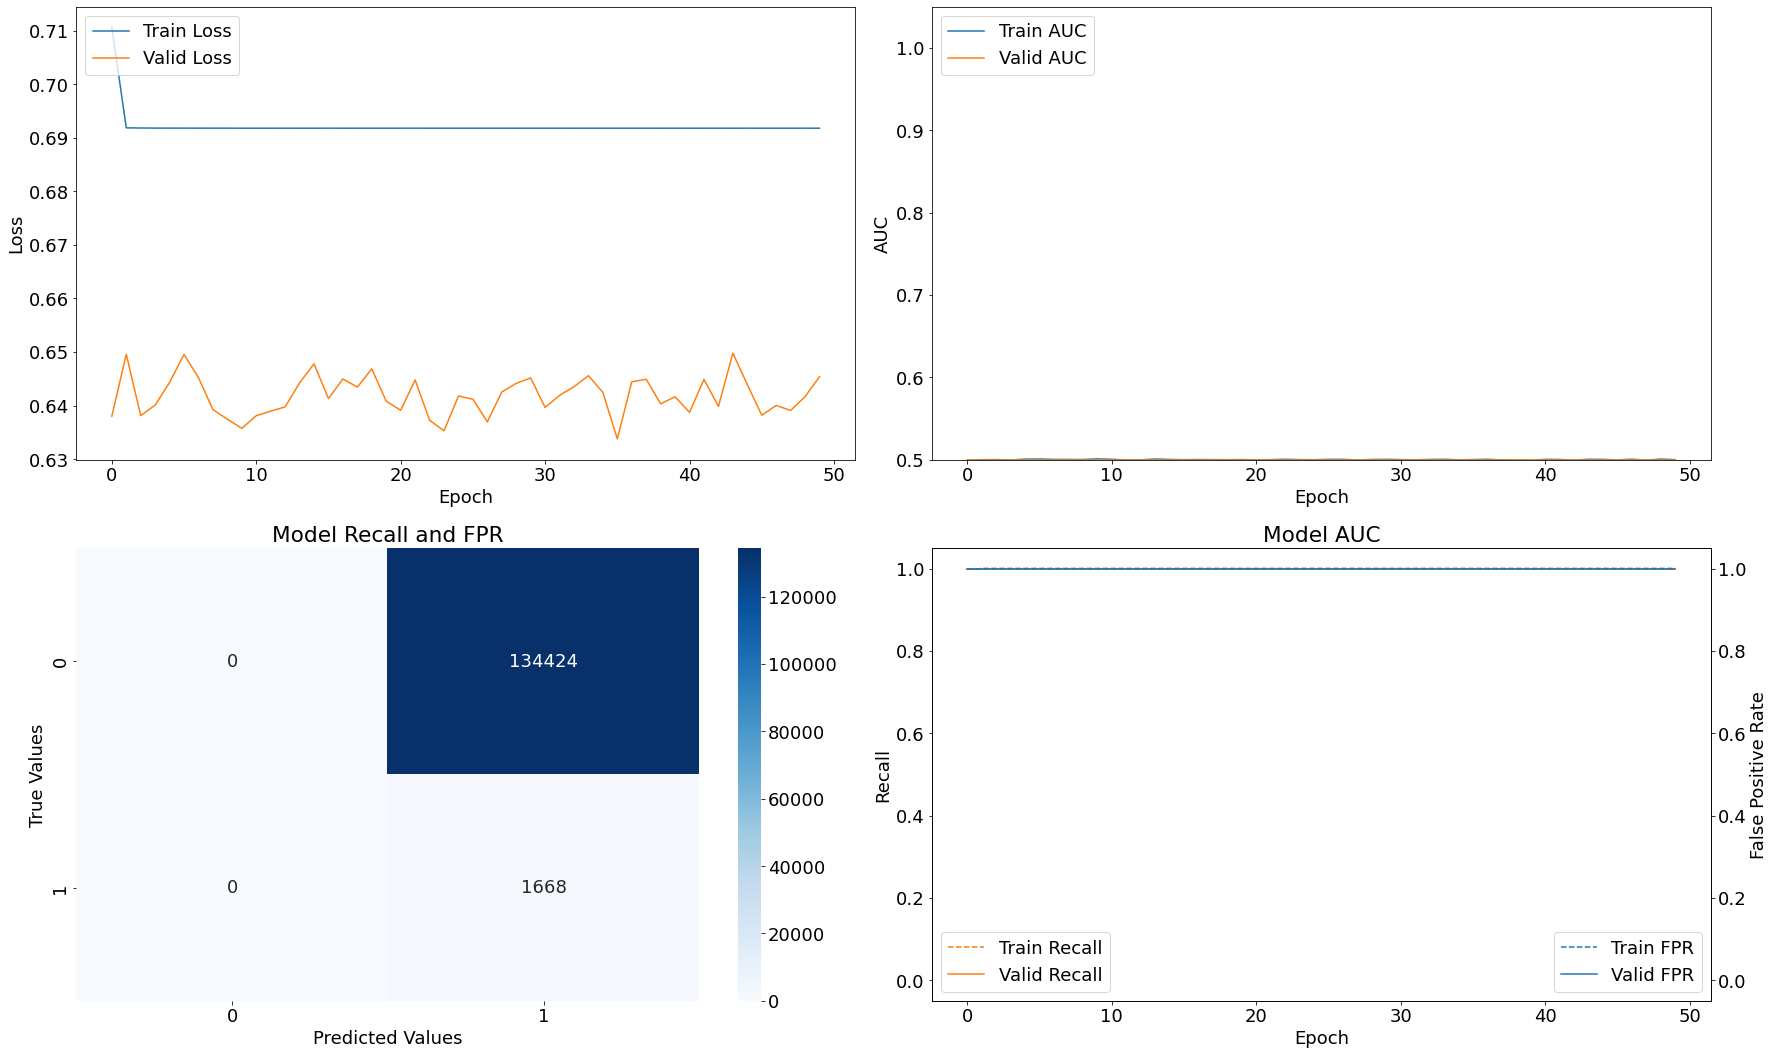

Results for Variant V Model V8 with threshold = 0.1.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


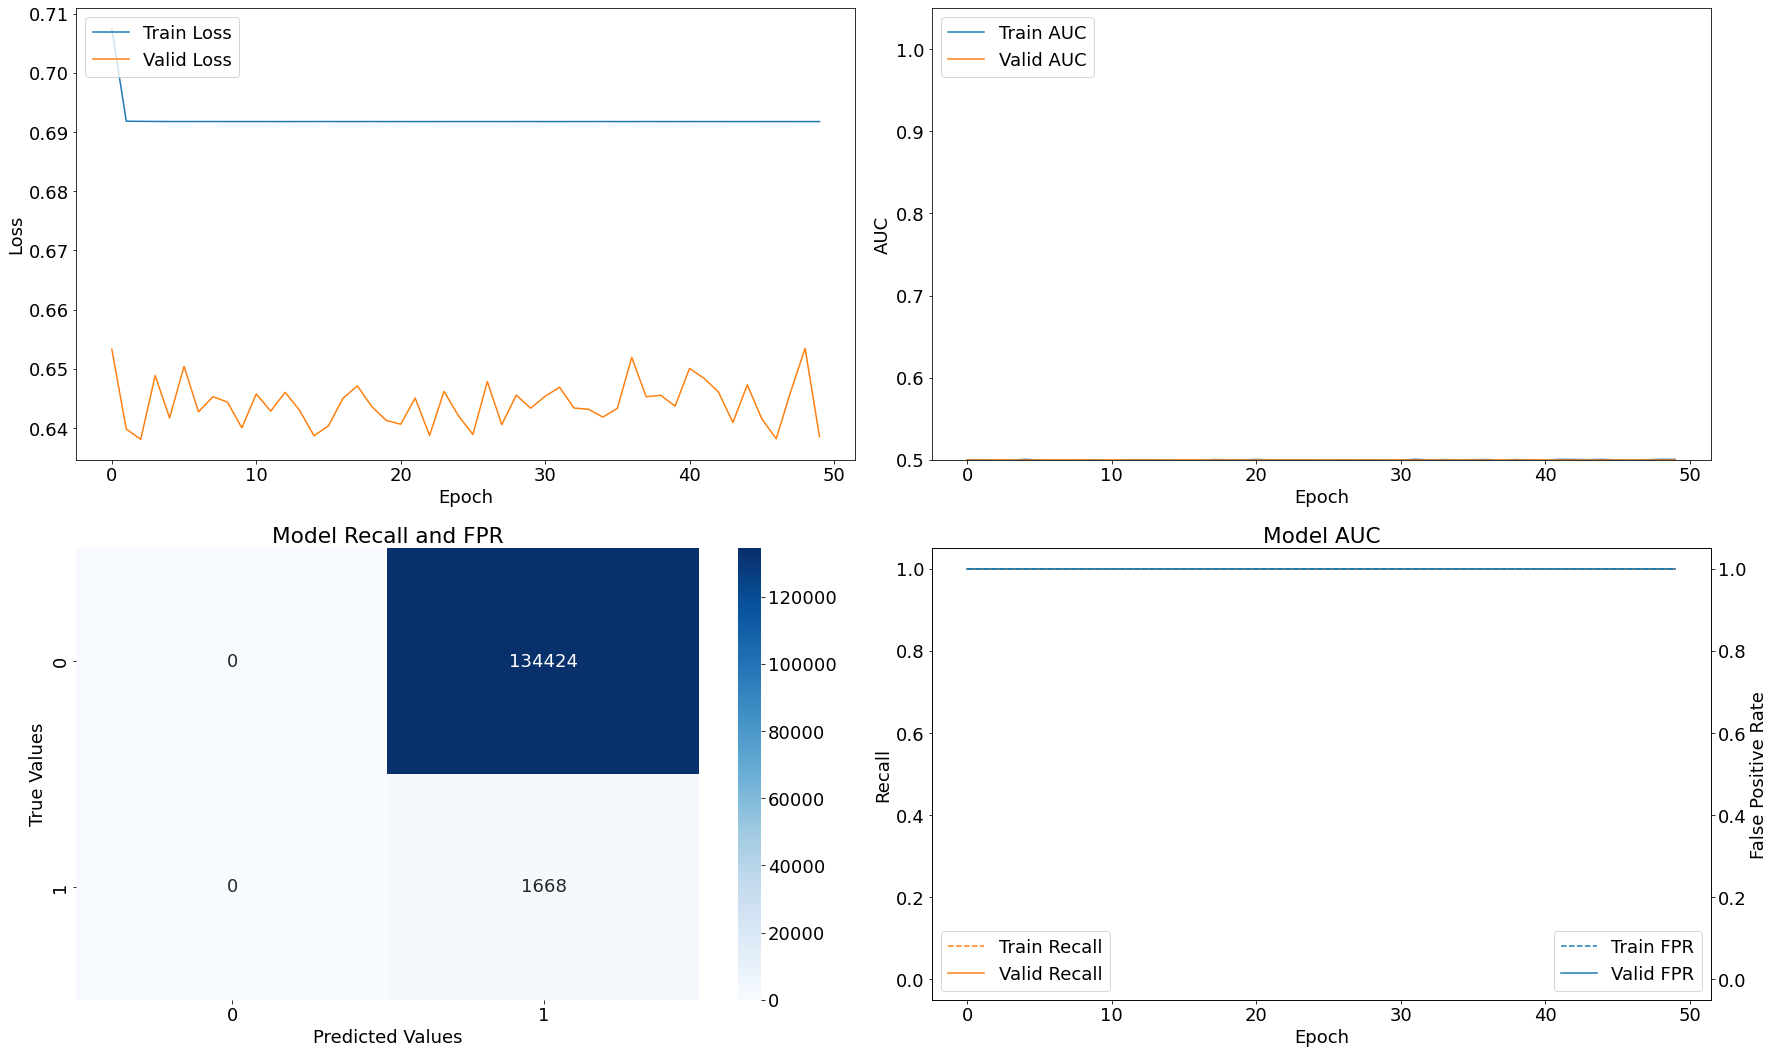

In [8]:
for t in thresholds:
    
    modelling_v8(X_train_v5_scaled_resampled,
                 y_train_v5_resampled,
                 X_val_v5_scaled,
                 y_val_v5,
                 'Variant V Model V8',
                 threshold=t)

---

### Ninth Model Iteration

In [9]:
def modelling_v9(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v9 = models.Sequential()

    model_v9.add(layers.Input(shape=(n_features, )))
    model_v9.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.Dense(1, activation='sigmoid'))

    model_v9.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v9_history = model_v9.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v9,
             name,
             model_v9_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00011: early stopping
Results for Variant V Model V9 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0 
 Val Recall: 0.0 

 Train FPR: 0.0 
 Val FPR: 0.0


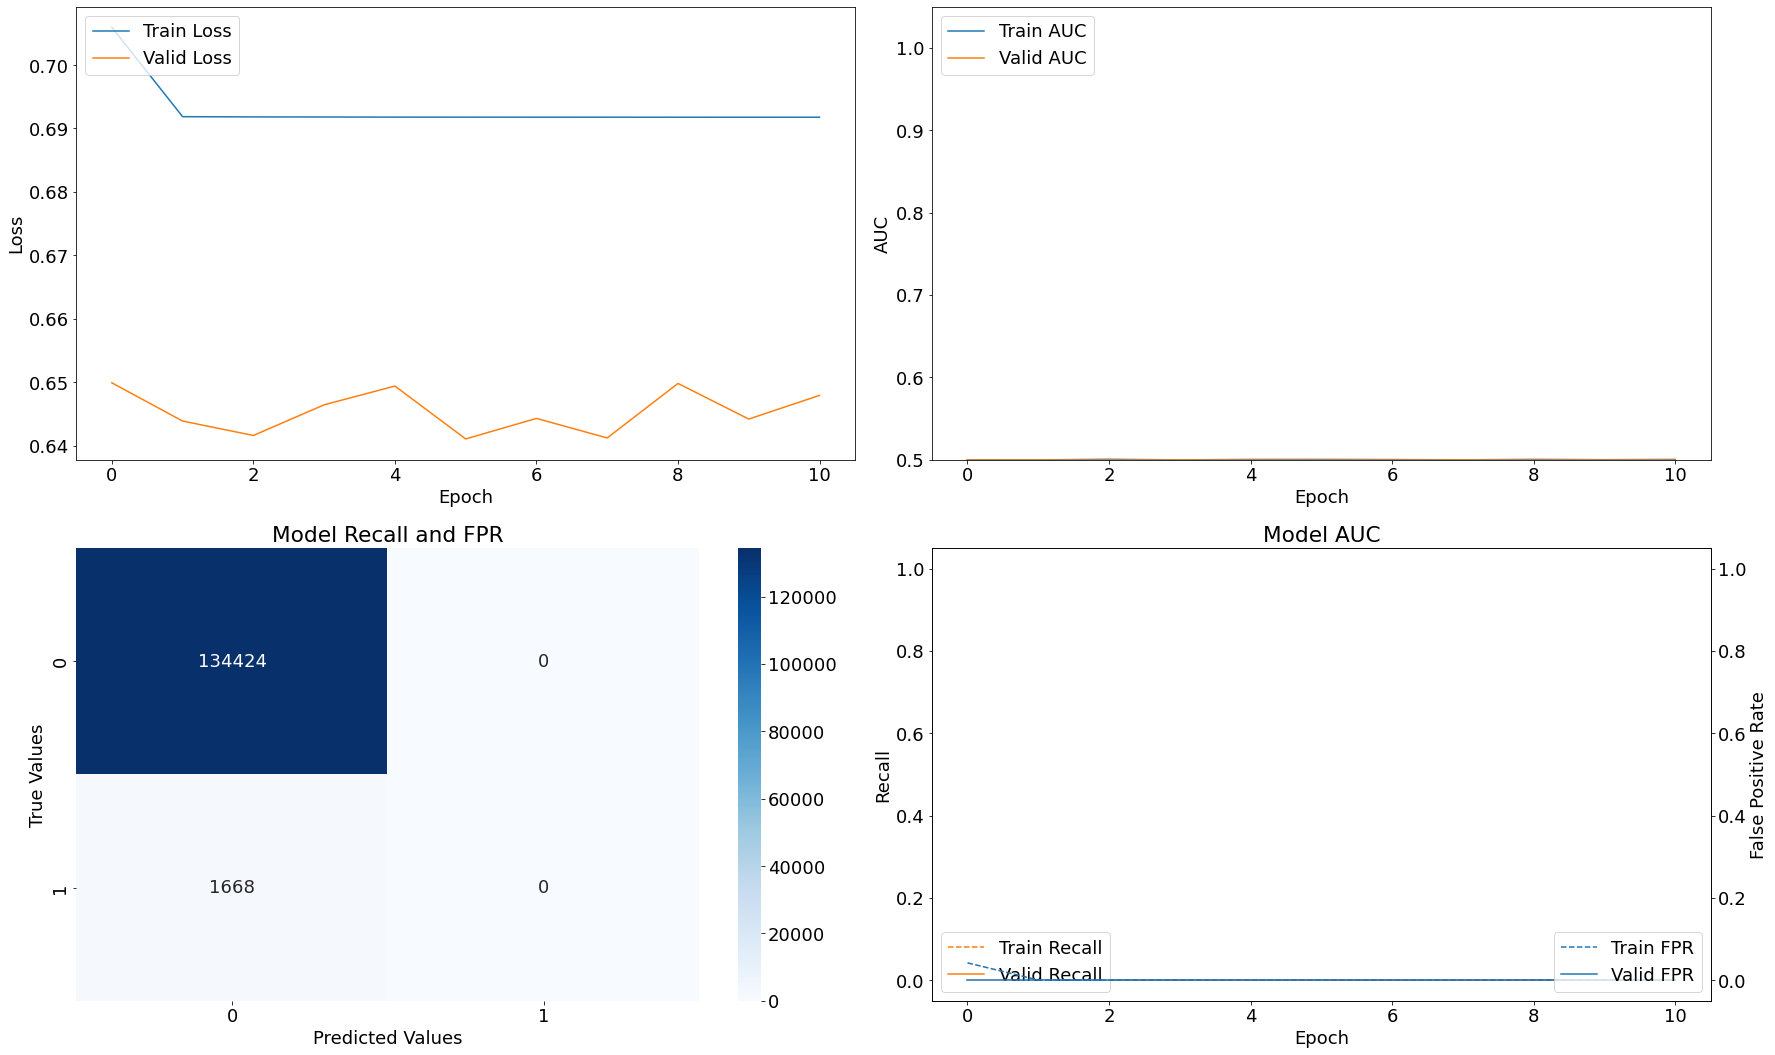

Epoch 00006: early stopping
Results for Variant V Model V9 with threshold = 0.4.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


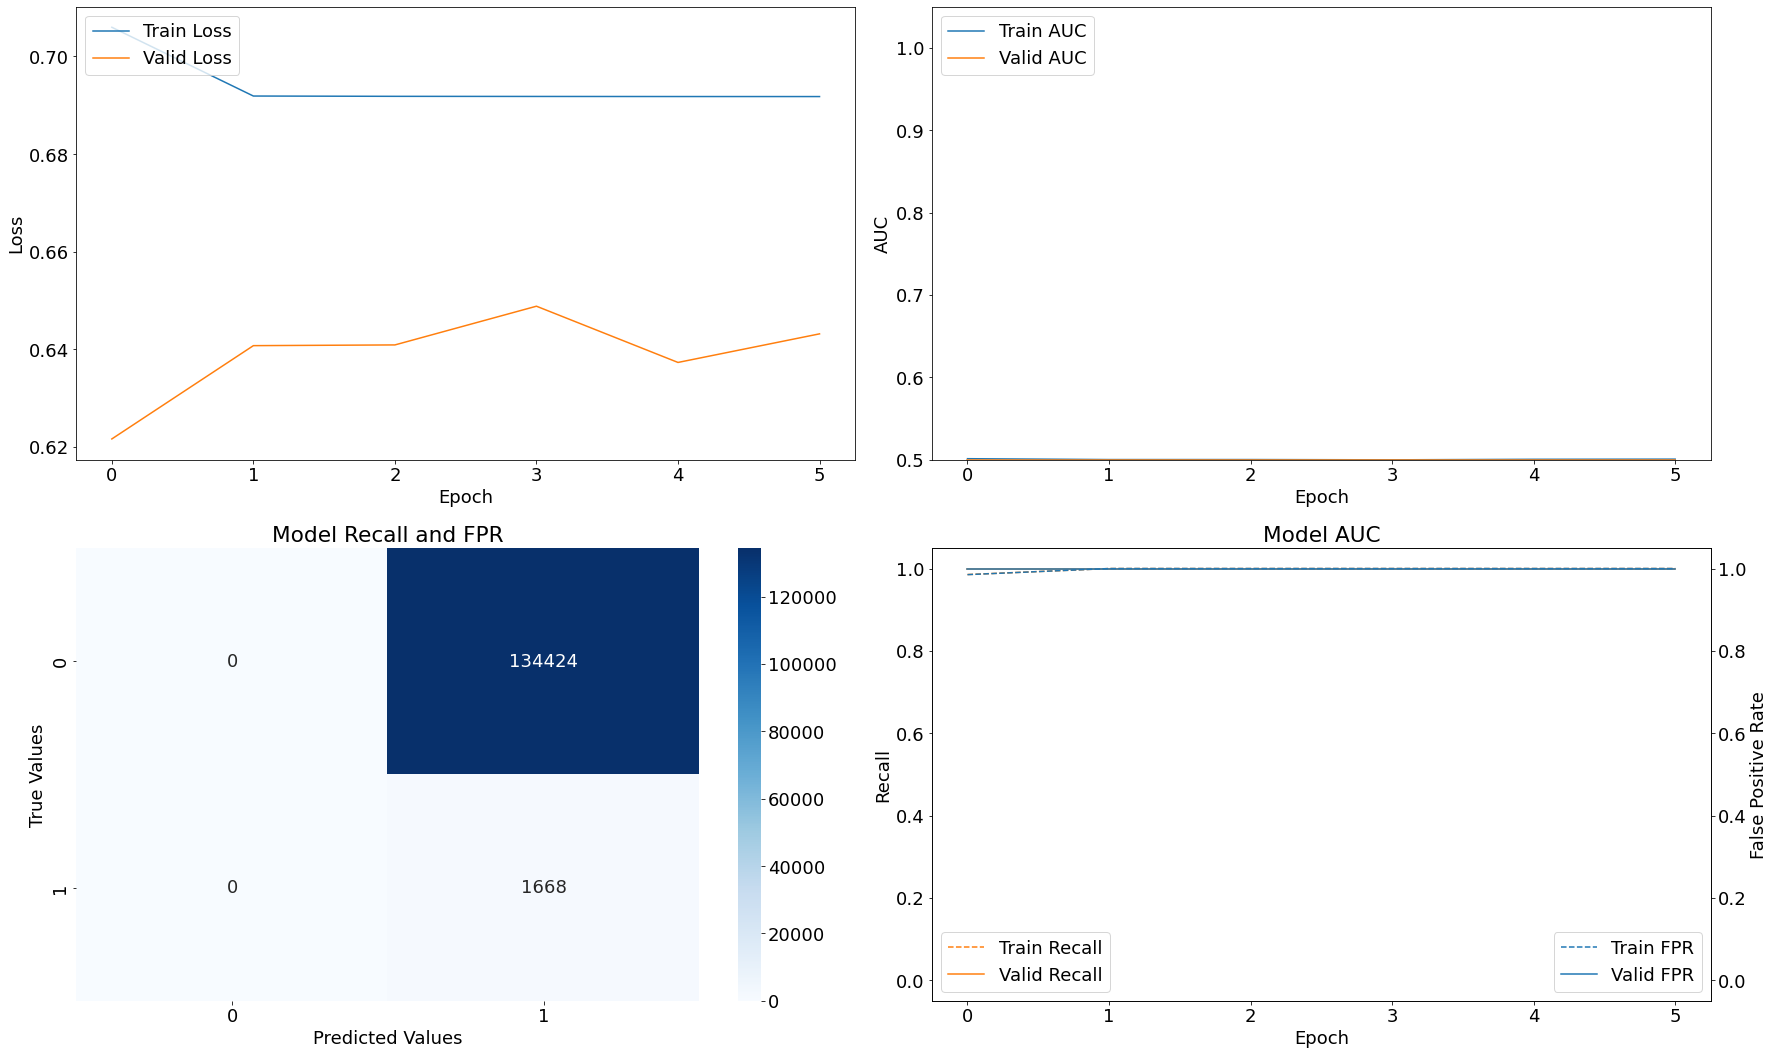

Epoch 00013: early stopping
Results for Variant V Model V9 with threshold = 0.3.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


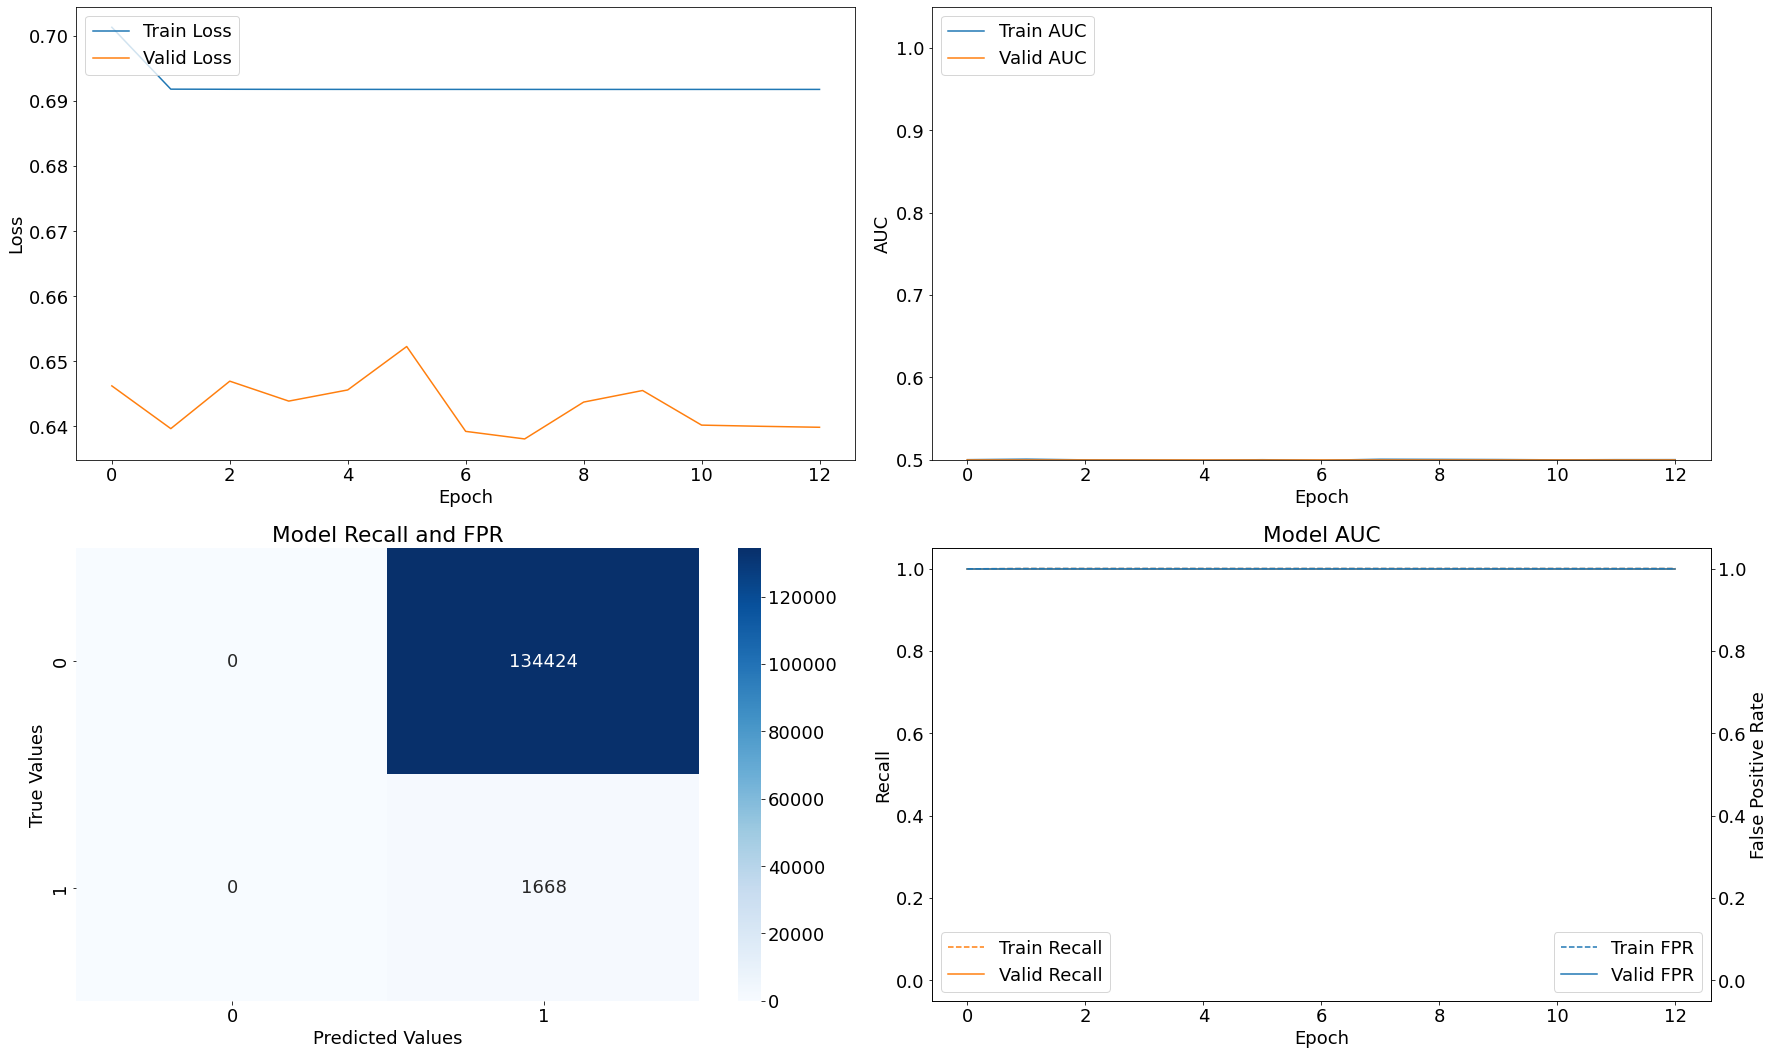

Epoch 00015: early stopping
Results for Variant V Model V9 with threshold = 0.2.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


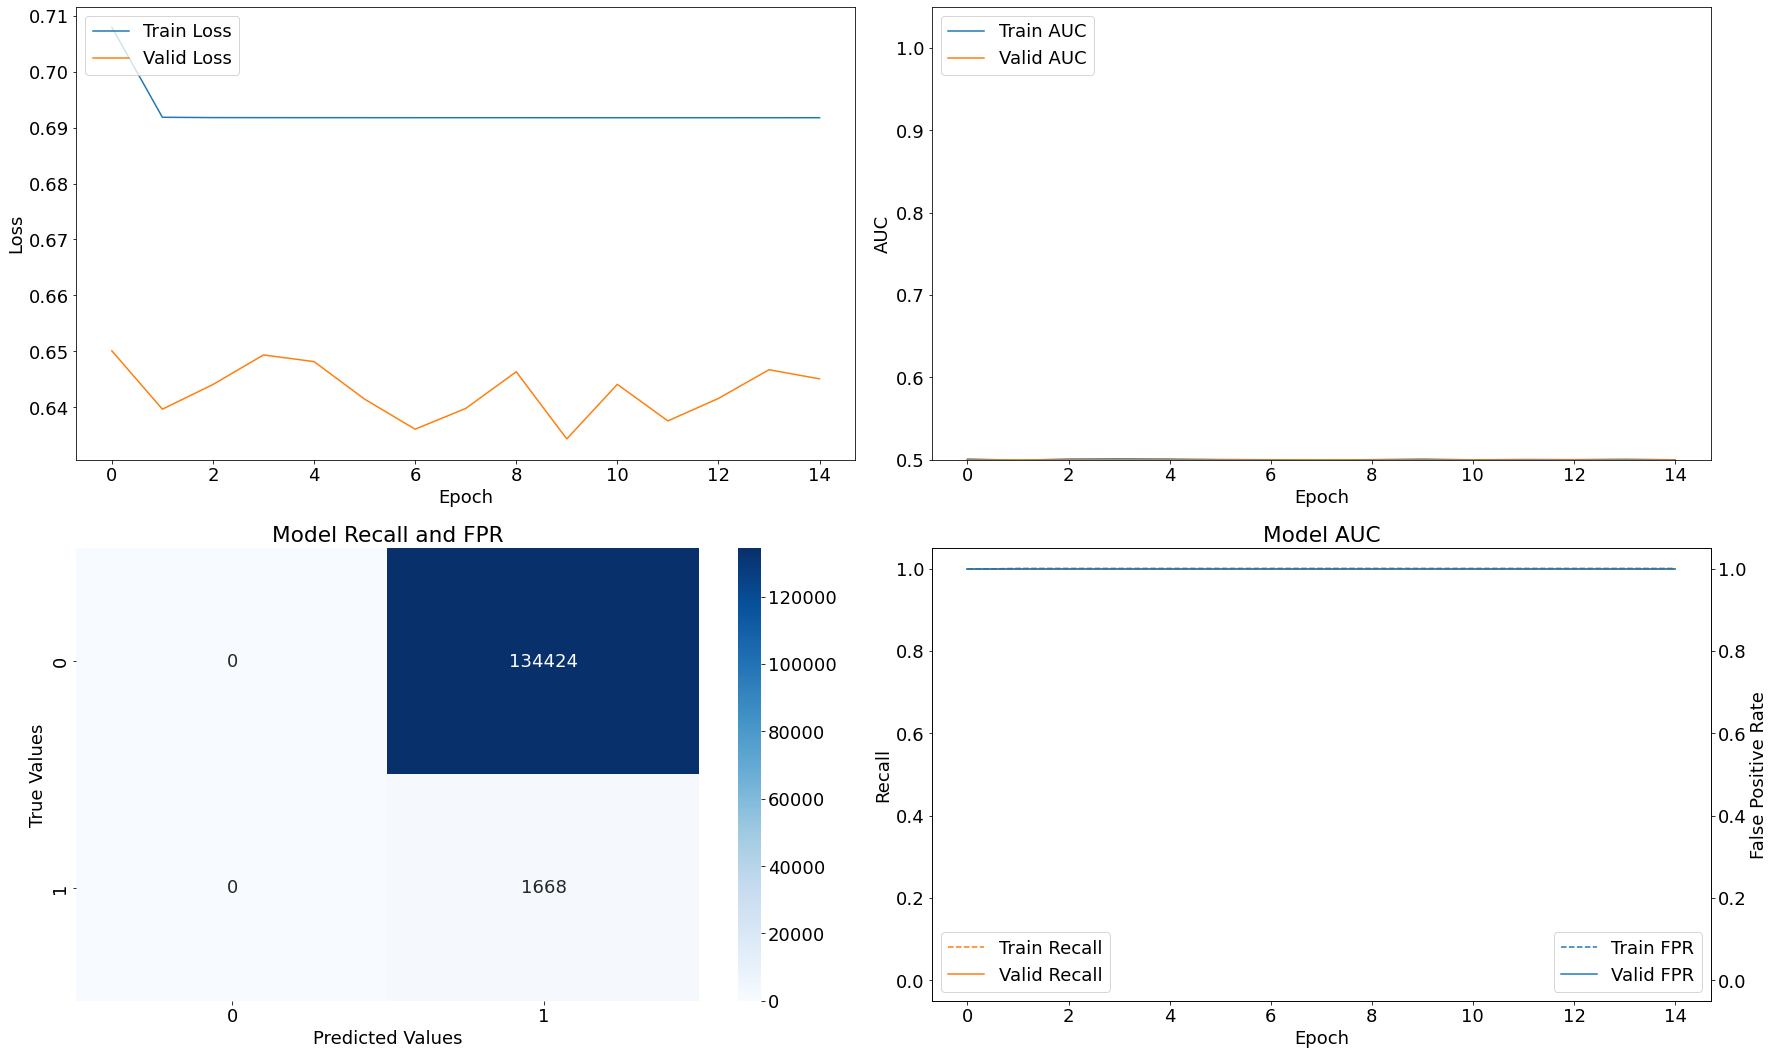

Epoch 00009: early stopping
Results for Variant V Model V9 with threshold = 0.1.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 1.0 
 Val Recall: 1.0 

 Train FPR: 1.0 
 Val FPR: 1.0


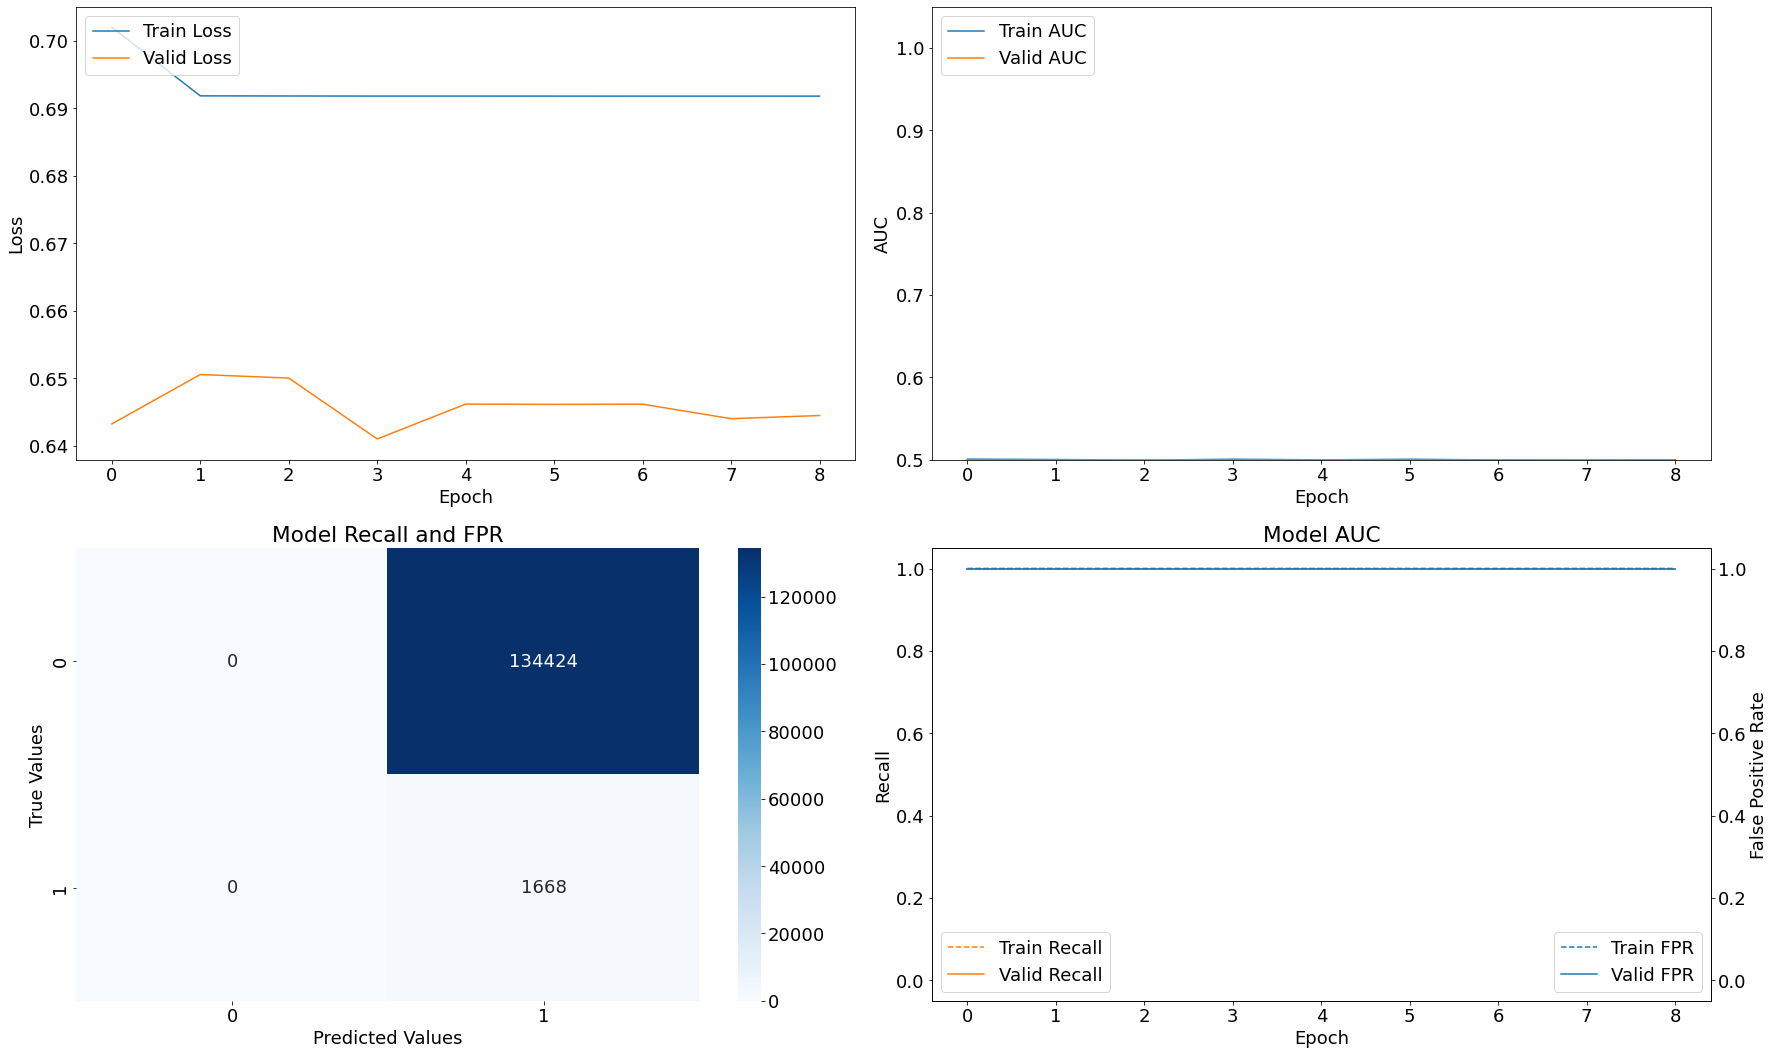

In [10]:
for t in thresholds:
    
    modelling_v9(X_train_v5_scaled_resampled,
                 y_train_v5_resampled,
                 X_val_v5_scaled,
                 y_val_v5,
                 'Variant V Model V9',
                 threshold=t)

---